# Load and compile all snowlines and AOIs, plot results

In [ ]:
# !pip install contextily

In [1]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely import wkt
import seaborn as sns
import contextily as ctx
from tqdm.auto import tqdm
from ast import literal_eval
import sys
from scipy.stats import median_abs_deviation
import string

In [ ]:
# If using Google Colab, mount Google Drive so you can access the files in this folder
# from google.colab import drive
# drive.mount('/content/drive')

## Determine settings and load functions

In [12]:
# define path to study-sites/
study_sites_path = '/Users/raineyaberle/Google Drive/My Drive/Research/CryoGARS-Glaciology/Advising/student-research/Alexandra-Friel/snow_cover_mapping_application/study-sites/'

# define path to snow-cover-mapping-application/
base_path = os.path.join(study_sites_path, '..', 'snow-cover-mapping-application')

# determine whether to save figures to file
save_figures = True

# path to save output figures
figures_out_path = os.path.join(study_sites_path, '..', 'snow-cover-mapping-application', 'figures')

# Load necessary functions
sys.path.insert(1, os.path.join(base_path, 'functions'))
import model_analyze_utils as f

## Construct and/or update training data

In [13]:
training_data_path = os.path.join(study_sites_path, '..', 'snow-cover-mapping-application', 'inputs-outputs')
training_data_fn = 'snowline_timeseries_full_training_data.csv'
training_data_df = f.construct_update_training_data(study_sites_path, training_data_path, training_data_fn)
training_data_df

Number of sites in file = 157
Training dataset already exists in directory, loading...
Adding new sites to training dataset...


  0%|          | 0/4 [00:00<?, ?it/s]

RGI60-01.15769


/Users/raineyaberle/opt/anaconda3/envs/snow-cover-mapping/lib/python3.11/site-packages/rioxarray/raster_writer.py:130: UserWarning: The nodata value (3.402823466e+38) has been automatically changed to (3.4028234663852886e+38) to match the dtype of the data.
  warnings.warn(


RGI60-01.15788


/Users/raineyaberle/opt/anaconda3/envs/snow-cover-mapping/lib/python3.11/site-packages/rioxarray/raster_writer.py:130: UserWarning: The nodata value (3.402823466e+38) has been automatically changed to (3.4028234663852886e+38) to match the dtype of the data.
  warnings.warn(


RGI60-01.19725


/Users/raineyaberle/opt/anaconda3/envs/snow-cover-mapping/lib/python3.11/site-packages/rioxarray/raster_writer.py:130: UserWarning: The nodata value (3.402823466e+38) has been automatically changed to (3.4028234663852886e+38) to match the dtype of the data.
  warnings.warn(


RGI60-02.00556
Training data re-saved to file: /Users/raineyaberle/Google Drive/My Drive/Research/CryoGARS-Glaciology/Advising/student-research/Alexandra-Friel/snow_cover_mapping_application/study-sites/../snow-cover-mapping-application/inputs-outputs/snowline_timeseries_full_training_data.csv


site_name       Date       AAR  ELA_from_AAR_m  \
0                Blue 2013-09-12  0.437856         1970.00   
1                Blue 2013-09-19  0.447500         1954.96   
2                Blue 2013-10-14  0.817829         1591.00   
3                Blue 2014-05-01  0.925804         1481.00   
4                Blue 2014-06-02  0.893074         1526.00   
...               ...        ...       ...             ...   
40205  RGI60-02.17738 2021-08-18  0.584552         2193.00   
40206  RGI60-02.17738 2021-08-18  0.584552         2193.00   
40207  RGI60-02.17738 2021-08-18  0.584552         2193.00   
40208  RGI60-02.17738 2021-08-18  0.584552         2193.00   
40209  RGI60-02.17738 2021-08-18  0.584552         2193.00   

       Cumulative_Positive_Degree_Days  Cumulative_Snowfall_mwe  PA_Ratio  \
0                          1083.073924                 2.063305  8.141722   
1                          1145.346363                 2.086689  8.141722   
2                          1194.868455                 0.062328  8.141722   
3                            30.896912                 1.545164  8.141722   
4                           164.490870                 1.694039  8.141722   
...                                ...                      ...       ...   
40205                       832.630152                 1.412379  8.708201   
40206                       832.630152                 1.412379  8.708201   
40207                       832.630152                 1.412379  8.708201   
40208                       832.630152                 1.412379  8.708201   
40209                       832.630152                 1.412379  8.708201   

       O1Region  O2Region   Area  Zmin  Zmax  Zmed  Slope  Aspect  \
0           2.0       4.0  5.663  1252  2371  1880   17.7      19   
1           2.0       4.0  5.663  1252  2371  1880   17.7      19   
2           2.0       4.0  5.663  1252  2371  1880   17.7      19   
3           2.0       4.0  5.663  1252  2371  1880   17.7      19   
4           2.0       4.0  5.663  1252  2371  1880   17.7      19   
...         ...       ...    ...   ...   ...   ...    ...     ...   
40205       2.0       2.0  7.082  1770  2626  2257   17.9     329   
40206       2.0       2.0  7.082  1770  2626  2257   17.9     329   
40207       2.0       2.0  7.082  1770  2626  2257   17.9     329   
40208       2.0       2.0  7.082  1770  2626  2257   17.9     329   
40209       2.0       2.0  7.082  1770  2626  2257   17.9     329   

       Hypsometric_Index Hypsometric_Index_Category  
0              -1.256000                  Top heavy  
1              -1.256000                  Top heavy  
2              -1.256000                  Top heavy  
3              -1.256000                  Top heavy  
4              -1.256000                  Top heavy  
...                  ...                        ...  
40205          -1.229219                  Top heavy  
40206          -1.229219                  Top heavy  
40207          -1.229219                  Top heavy  
40208          -1.229219                  Top heavy  
40209          -1.229219                  Top heavy  

[40210 rows x 17 columns]

## Subset the training data: sample conditions for median week of minimum AAR in each subregion

In [14]:
training_data_subset_path = os.path.join(study_sites_path, '..', 'snow-cover-mapping-application', 'inputs-outputs')
training_data_subset_fn = 'snowline_timeseries_subset_training_data.csv'
training_data_subset_df = f.subset_training_data(training_data_df, training_data_subset_path, training_data_subset_fn)
training_data_subset_df

Constructing training data subset...
Alaska Range


/Users/raineyaberle/Google Drive/My Drive/Research/CryoGARS-Glaciology/Advising/student-research/Alexandra-Friel/snow_cover_mapping_application/study-sites/../snow-cover-mapping-application/functions/model_analyze_utils.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  snowlines_subregion.loc[:, 'Week'] = snowlines_subregion['Date'].dt.isocalendar().week
/Users/raineyaberle/Google Drive/My Drive/Research/CryoGARS-Glaciology/Advising/student-research/Alexandra-Friel/snow_cover_mapping_application/study-sites/../snow-cover-mapping-application/functions/model_analyze_utils.py:289: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

  0%|          | 0/18 [00:00<?, ?it/s]

Aleutians


/Users/raineyaberle/Google Drive/My Drive/Research/CryoGARS-Glaciology/Advising/student-research/Alexandra-Friel/snow_cover_mapping_application/study-sites/../snow-cover-mapping-application/functions/model_analyze_utils.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  snowlines_subregion.loc[:, 'Week'] = snowlines_subregion['Date'].dt.isocalendar().week
/Users/raineyaberle/Google Drive/My Drive/Research/CryoGARS-Glaciology/Advising/student-research/Alexandra-Friel/snow_cover_mapping_application/study-sites/../snow-cover-mapping-application/functions/model_analyze_utils.py:289: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

  0%|          | 0/28 [00:00<?, ?it/s]

W. Chugach Mtns.


/Users/raineyaberle/Google Drive/My Drive/Research/CryoGARS-Glaciology/Advising/student-research/Alexandra-Friel/snow_cover_mapping_application/study-sites/../snow-cover-mapping-application/functions/model_analyze_utils.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  snowlines_subregion.loc[:, 'Week'] = snowlines_subregion['Date'].dt.isocalendar().week
/Users/raineyaberle/Google Drive/My Drive/Research/CryoGARS-Glaciology/Advising/student-research/Alexandra-Friel/snow_cover_mapping_application/study-sites/../snow-cover-mapping-application/functions/model_analyze_utils.py:289: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

  0%|          | 0/17 [00:00<?, ?it/s]

St. Elias Mtns.


/Users/raineyaberle/Google Drive/My Drive/Research/CryoGARS-Glaciology/Advising/student-research/Alexandra-Friel/snow_cover_mapping_application/study-sites/../snow-cover-mapping-application/functions/model_analyze_utils.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  snowlines_subregion.loc[:, 'Week'] = snowlines_subregion['Date'].dt.isocalendar().week
/Users/raineyaberle/Google Drive/My Drive/Research/CryoGARS-Glaciology/Advising/student-research/Alexandra-Friel/snow_cover_mapping_application/study-sites/../snow-cover-mapping-application/functions/model_analyze_utils.py:289: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

  0%|          | 0/13 [00:00<?, ?it/s]

N. Coast Ranges


/Users/raineyaberle/Google Drive/My Drive/Research/CryoGARS-Glaciology/Advising/student-research/Alexandra-Friel/snow_cover_mapping_application/study-sites/../snow-cover-mapping-application/functions/model_analyze_utils.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  snowlines_subregion.loc[:, 'Week'] = snowlines_subregion['Date'].dt.isocalendar().week
/Users/raineyaberle/Google Drive/My Drive/Research/CryoGARS-Glaciology/Advising/student-research/Alexandra-Friel/snow_cover_mapping_application/study-sites/../snow-cover-mapping-application/functions/model_analyze_utils.py:289: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

  0%|          | 0/17 [00:00<?, ?it/s]

N. Rockies


/Users/raineyaberle/Google Drive/My Drive/Research/CryoGARS-Glaciology/Advising/student-research/Alexandra-Friel/snow_cover_mapping_application/study-sites/../snow-cover-mapping-application/functions/model_analyze_utils.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  snowlines_subregion.loc[:, 'Week'] = snowlines_subregion['Date'].dt.isocalendar().week
/Users/raineyaberle/Google Drive/My Drive/Research/CryoGARS-Glaciology/Advising/student-research/Alexandra-Friel/snow_cover_mapping_application/study-sites/../snow-cover-mapping-application/functions/model_analyze_utils.py:289: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

  0%|          | 0/12 [00:00<?, ?it/s]

N. Cascades


/Users/raineyaberle/Google Drive/My Drive/Research/CryoGARS-Glaciology/Advising/student-research/Alexandra-Friel/snow_cover_mapping_application/study-sites/../snow-cover-mapping-application/functions/model_analyze_utils.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  snowlines_subregion.loc[:, 'Week'] = snowlines_subregion['Date'].dt.isocalendar().week
/Users/raineyaberle/Google Drive/My Drive/Research/CryoGARS-Glaciology/Advising/student-research/Alexandra-Friel/snow_cover_mapping_application/study-sites/../snow-cover-mapping-application/functions/model_analyze_utils.py:289: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

  0%|          | 0/18 [00:00<?, ?it/s]

C. Rockies


/Users/raineyaberle/Google Drive/My Drive/Research/CryoGARS-Glaciology/Advising/student-research/Alexandra-Friel/snow_cover_mapping_application/study-sites/../snow-cover-mapping-application/functions/model_analyze_utils.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  snowlines_subregion.loc[:, 'Week'] = snowlines_subregion['Date'].dt.isocalendar().week
/Users/raineyaberle/Google Drive/My Drive/Research/CryoGARS-Glaciology/Advising/student-research/Alexandra-Friel/snow_cover_mapping_application/study-sites/../snow-cover-mapping-application/functions/model_analyze_utils.py:289: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

  0%|          | 0/15 [00:00<?, ?it/s]

S. Cascades


/Users/raineyaberle/Google Drive/My Drive/Research/CryoGARS-Glaciology/Advising/student-research/Alexandra-Friel/snow_cover_mapping_application/study-sites/../snow-cover-mapping-application/functions/model_analyze_utils.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  snowlines_subregion.loc[:, 'Week'] = snowlines_subregion['Date'].dt.isocalendar().week
/Users/raineyaberle/Google Drive/My Drive/Research/CryoGARS-Glaciology/Advising/student-research/Alexandra-Friel/snow_cover_mapping_application/study-sites/../snow-cover-mapping-application/functions/model_analyze_utils.py:289: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

  0%|          | 0/10 [00:00<?, ?it/s]

S. Rockies


/Users/raineyaberle/Google Drive/My Drive/Research/CryoGARS-Glaciology/Advising/student-research/Alexandra-Friel/snow_cover_mapping_application/study-sites/../snow-cover-mapping-application/functions/model_analyze_utils.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  snowlines_subregion.loc[:, 'Week'] = snowlines_subregion['Date'].dt.isocalendar().week
/Users/raineyaberle/Google Drive/My Drive/Research/CryoGARS-Glaciology/Advising/student-research/Alexandra-Friel/snow_cover_mapping_application/study-sites/../snow-cover-mapping-application/functions/model_analyze_utils.py:289: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

  0%|          | 0/8 [00:00<?, ?it/s]

Training data subset saved to file: /Users/raineyaberle/Google Drive/My Drive/Research/CryoGARS-Glaciology/Advising/student-research/Alexandra-Friel/snow_cover_mapping_application/study-sites/../snow-cover-mapping-application/inputs-outputs/snowline_timeseries_subset_training_data.csv


Year       AAR  ELA_from_AAR_m       site_name  O1Region  O2Region  Week  \
0    2017  0.218374        2047.740         Gulkana       1.0       2.0  32.0   
1    2019  0.453814        1897.320         Gulkana       1.0       2.0  32.0   
2    2020  0.813879        1568.790         Gulkana       1.0       2.0  32.0   
3    2021  0.940470        1406.050         Gulkana       1.0       2.0  32.0   
4    2017  0.217741        2036.230  RGI60-01.00037       1.0       2.0  32.0   
..    ...       ...             ...             ...       ...       ...   ...   
466  2014  0.167092        2583.380          Sperry       2.0       5.0  38.0   
467  2018  0.974741        2316.290          Sperry       2.0       5.0  38.0   
468  2020  0.116500        2645.350          Sperry       2.0       5.0  38.0   
469  2021  0.607843        2423.390          Sperry       2.0       5.0  38.0   
470  2022  0.214674        2594.345          Sperry       2.0       5.0  38.0   

      PA_Ratio     Area  Zmin  Zmax  Zmed  Slope  Aspect  Hypsometric_Index  \
0     9.448763   17.567  1162  2438  1858   14.0     172          -1.140053   
1     9.448763   17.567  1162  2438  1858   14.0     172          -1.140053   
2     9.448763   17.567  1162  2438  1858   14.0     172          -1.140053   
3     9.448763   17.567  1162  2438  1858   14.0     172          -1.140053   
4    26.812027  234.583   722  3081  1841   12.0      30          -1.493916   
..         ...      ...   ...   ...   ...    ...     ...                ...   
466   6.630013    1.281  2248  2761  2383   18.9     345           2.971223   
467   6.630013    1.281  2248  2761  2383   18.9     345           2.971223   
468   6.630013    1.281  2248  2761  2383   18.9     345           2.971223   
469   6.630013    1.281  2248  2761  2383   18.9     345           2.971223   
470   6.630013    1.281  2248  2761  2383   18.9     345           2.971223   

    Hypsometric_Index_Category  
0              Equidimensional  
1              Equidimensional  
2              Equidimensional  
3              Equidimensional  
4                    Top heavy  
..                         ...  
466          Very bottom heavy  
467          Very bottom heavy  
468          Very bottom heavy  
469          Very bottom heavy  
470          Very bottom heavy  

[471 rows x 16 columns]

## Plot terrain parameters and AAR distributions of training data

In [ ]:
# # -----Set up figure
# plt.rcParams.update({'font.size':14, 'font.sans-serif': 'Arial'})
# fig, ax = plt.subplots(2, 3, figsize=(16, 8))
# ax = ax.flatten()
# # define settings for each column
# columns = ['Area', 'Zmed', 'Hypsometric_Index', 'Aspect', 'Slope']
# ranges = [np.arange(0.5, 1000, step=1),    # Areas
#           np.arange(500, 3000, step=100),  # Zmeds
#           np.arange(-3, 3, step=0.2),     # HIs
#           np.arange(0, 360, step=20),      # Aspects
#           np.arange(5, 30, step=1)]        # Slopes
# units = ['km$^2$', 'm.a.s.l.', 'm/m', 'degrees', 'degrees']
# colors = ['k', 'g', 'c', 'r', 'm', 'b']

# # -----Iterate over terrain parameters
# i=0
# for column, unit, color in list(zip(columns, units, colors)):
#     # divide column into range of values
#     # range = np.linspace(training_data_subset_df[column].min(), training_data_subset_df[column].max(), num=10)
#     # meds = np.zeros(10)
#     # plot results   
#     ax[i].plot(training_data_subset_df[column], training_data_subset_df['AAR'], '.', color=color)
#     ax[i].set_ylim(0, 1)
#     ax[i].grid()
#     ax[i].set_title(column.replace('_', ' '))
#     ax[i].set_ylabel('[' + unit + ']')
#     ax[i].set_xlabel('AAR')

#     i+=1

# fig.delaxes(ax[-1])
# fig.tight_layout()
# plt.show()

# # -----Save figure
# # fig_fn = os.path.join(figures_out_path, 'model_sensitivities_terrain_parameters.png')
# # fig.savefig(fig_fn, dpi=300, bbox_inches='tight')
# # print('figure saved to file: ' + fig_fn)

## Plot a few AAR time series as an example

In [ ]:
# define sites to plot
site_names = ['Gulkana', 'LemonCreek', 'SouthCascade']

# set up figure
plt.rcParams.update({'font.size':16, 'font.sans-serif':'Arial'})
fig, ax = plt.subplots(len(site_names), 1, figsize=(12, 4*len(site_names)))

# iterate over site names
for i, site_name in enumerate(site_names):
    # load snowlines
    snowline_fns = glob.glob(os.path.join(study_sites_path, site_name, 'imagery', 'snowlines', '*.csv'))
    snowlines = pd.DataFrame()
    for snowline_fn in snowline_fns:
        snowline = pd.read_csv(snowline_fn)
        snowlines = pd.concat([snowlines, snowline])
    snowlines.reset_index(drop=True, inplace=True)
    snowlines['datetime'] = pd.to_datetime(snowlines['datetime'], format='mixed')

    # plot 
    # Sentinel-2 TOA
    ax[i].plot(snowlines.loc[snowlines['dataset']=='Sentinel-2_TOA', 'datetime'], 
               snowlines.loc[snowlines['dataset']=='Sentinel-2_TOA', 'AAR'], 'o',
               markersize=5, markeredgecolor='#7570b3', markerfacecolor='None', 
               markeredgewidth=1.5, label='Sentinel-2 TOA')
    # Sentinel-2 SR
    ax[i].plot(snowlines.loc[snowlines['dataset']=='Sentinel-2_SR', 'datetime'], 
               snowlines.loc[snowlines['dataset']=='Sentinel-2_SR', 'AAR'], 'o', 
               markersize=7, markeredgecolor='w', markerfacecolor='#7570b3', 
               markeredgewidth=1, label='Sentinel-2 SR')
    # Landsat
    ax[i].plot(snowlines.loc[snowlines['dataset']=='Landsat', 'datetime'], 
               snowlines.loc[snowlines['dataset']=='Landsat', 'AAR'], '^', 
               markersize=7, markeredgecolor='w', markerfacecolor='#d95f02',
               markeredgewidth=1, label='Landsat 8/9 SR')
    ax[i].grid()
    ax[i].set_xlim(np.datetime64('2013-01-01'), np.datetime64('2023-01-01'))
    ax[i].set_ylim(0, 1.1)
    if site_name=='LemonCreek':
        label = 'Lemon Creek'
    elif site_name=='SouthCascade':
        label = 'South Cascade'
    else:
        label = site_name
    ax[i].text(np.datetime64('2013-03-01'), 0.1, label + ' Glacier', bbox=dict(facecolor='w', pad=3))

ax[0].legend(loc='upper center', bbox_to_anchor=[0.4, 1.0, 0.2, 0.2], ncols=3, markerscale=2)
ax[1].set_ylabel('Accumulation area ratio')

plt.show()

# save figure
if save_figures:
    fig_fn = 'example_AAR_timeseries.png'
    fig.savefig(os.path.join(figures_out_path, fig_fn), dpi=300, bbox_inches='tight')
    print('figure saved to file: ' + os.path.join(figures_out_path, fig_fn))

## Load RGI glacier outlines

In [15]:
site_names = sorted(training_data_df['site_name'].drop_duplicates().values)
aois = pd.DataFrame()
for site_name in tqdm(site_names):
    if 'RGI' in site_name:
        aoi_fn = os.path.join(study_sites_path, site_name, 'AOIs', site_name + '_outline.shp')
    else:
        aoi_fn = os.path.join(study_sites_path, site_name, 'AOIs', site_name + '_RGI_outline.shp')
    aoi = gpd.read_file(aoi_fn)
    # make sure RGIId is the site_name in training data so their glacier outlines can be located later
    if 'RGI' not in site_name:
        training_data_df.loc[training_data_df['site_name']==site_name, 'site_name'] = aoi['RGIId'][0]
    aoi = aoi.to_crs('EPSG:4326')
    aois = pd.concat([aois, aoi])
aois.reset_index(drop=True, inplace=True)
aois

  0%|          | 0/155 [00:00<?, ?it/s]

RGIId         GLIMSId   BgnDate   EndDate     CenLon    CenLat  \
0    RGI60-02.14017  G236304E47810N  19879999  -9999999 -123.69570  47.80982   
1    RGI60-02.17741  G238208E48771N  19759999  -9999999 -121.79248  48.77098   
2    RGI60-02.14256  G238227E46901N  19709999  19949999 -121.77327  46.90137   
3    RGI60-02.17736  G238150E48784N  19759999  -9999999 -121.85035  48.78422   
4    RGI60-02.17739  G238170E48750N  19749999  -9999999 -121.82996  48.74956   
..              ...             ...       ...       ...        ...       ...   
150  RGI60-02.17738  G238159E48761N  19759999  -9999999 -121.84148  48.76089   
151  RGI60-01.14391  G220204E60098N  20100914  -9999999 -139.79600  60.09800   
152  RGI60-02.18778  G238943E48357N  19589999  -9999999 -121.05735  48.35698   
153  RGI60-02.17023  G246243E48625N  19669999  -9999999 -113.75707  48.62495   
154  RGI60-01.09162  G211092E60412N  20060912  -9999999 -148.90800  60.41200   

    O1Region O2Region     Area  Zmin  ...  Aspect   Lmax  Status  Connect  \
0          2        4    5.663  1252  ...      19   4616       0        0   
1          2        4    6.290  1412  ...      98   4583       0        0   
2          2        4    8.004  1085  ...     354   9168       0        0   
3          2        4    6.834  1217  ...     331   4719       0        0   
4          2        4    2.888  1582  ...     199   4307       0        0   
..       ...      ...      ...   ...  ...     ...    ...     ...      ...   
150        2        4    4.996  1192  ...     217   5979       0        0   
151        1        5  176.999     0  ...      83  36294       0        0   
152        2        4    2.924  1613  ...     350   3338       0        0   
153        2        5    1.281  2248  ...     345   1823       0        0   
154        1        4   16.749   426  ...     188   7984       0        0   

     Form  TermType  Surging  Linkages                      Name  \
0       0         0        0         1           Blue Glacier WA   
1       0         0        0         9        Boulder Glacier WA   
2       0         0        0         9         Carbon Glacier WA   
3       0         0        0         9        Coleman Glacier WA   
4       0         0        0         1         Easton Glacier WA   
..    ...       ...      ...       ...                       ...   
150     0         0        0         9         Deming Glacier WA   
151     0         1        9         9            Turner Glacier   
152     0         0        0         1  South Cascade Glacier WA   
153     0         0        0         1         Sperry Glacier MT   
154     0         0        9         1         Wolverine Glacier   

                                              geometry  
0    POLYGON ((-123.69208 47.82729, -123.69192 47.8...  
1    POLYGON ((-121.82016 48.77583, -121.82016 48.7...  
2    POLYGON ((-121.79189 46.94312, -121.79201 46.9...  
3    POLYGON ((-121.88439 48.78574, -121.88431 48.7...  
4    POLYGON ((-121.84130 48.75010, -121.84127 48.7...  
..                                                 ...  
150  POLYGON ((-121.82020 48.77586, -121.82017 48.7...  
151  POLYGON ((-139.88434 60.19759, -139.88351 60.1...  
152  POLYGON ((-121.07246 48.35684, -121.07228 48.3...  
153  POLYGON ((-113.76715 48.62522, -113.76695 48.6...  
154  POLYGON ((-148.93630 60.40852, -148.93628 60.4...  

[155 rows x 23 columns]

## Determine subregions in training data

In [16]:
# -----Display unique subregions and number in each
aois[['O1Region', 'O2Region']] = aois[['O1Region', 'O2Region']].astype(float)
aois = aois.sort_values(by=['O1Region', 'O2Region']).reset_index(drop=True)
unique_subregion_counts = aois[['O1Region', 'O2Region']].value_counts().reset_index(name='count')
unique_subregion_counts = unique_subregion_counts.sort_values(by=['O1Region', 'O2Region']).reset_index(drop=True)
# grab unique subregions
unique_subregions = unique_subregion_counts[['O1Region', 'O2Region']].values
unique_subregion_counts

O1Region  O2Region  count
0       1.0       2.0     18
1       1.0       3.0     28
2       1.0       4.0     17
3       1.0       5.0     13
4       1.0       6.0     17
5       2.0       1.0     12
6       2.0       2.0     17
7       2.0       3.0     15
8       2.0       4.0     10
9       2.0       5.0      8

## Plot some figures

### Geographic distribution of sites

In [20]:
# load RGI glacier boundaries
rgi_path = '/Users/raineyaberle/Google Drive/My Drive/Research/CryoGARS-Glaciology/Advising/student-research/Alexandra-Friel/snow_cover_mapping_application/GIS_data/'
# RGI shapefile names
rgi_fns = ['01_rgi60_Alaska/01_rgi60_Alaska.shp',
           '02_rgi60_WesternCanadaUS/02_rgi60_WesternCanadaUS.shp']
rgis = gpd.GeoDataFrame()
for rgi_fn in rgi_fns:
    file = gpd.read_file(os.path.join(rgi_path, rgi_fn))
    rgis = pd.concat([rgis, file])
rgis['O1Region'] = rgis['O1Region'].astype(float)
rgis['O2Region'] = rgis['O2Region'].astype(float)
rgis = rgis.sort_values(by=['O1Region', 'O2Region']).reset_index(drop=True)
rgis

RGIId         GLIMSId   BgnDate   EndDate      CenLon  \
0      RGI60-01.01855  G211685E68412N  20100919  -9999999 -148.315000   
1      RGI60-01.01856  G211698E68406N  20100919  -9999999 -148.302000   
2      RGI60-01.01857  G211719E68404N  20100919  -9999999 -148.281000   
3      RGI60-01.01858  G210941E68325N  20100919  -9999999 -149.059000   
4      RGI60-01.01859  G210882E68283N  20100919  -9999999 -149.118000   
...               ...             ...       ...       ...         ...   
45958  RGI60-02.18851  G254352E40255N  20019999  -9999999 -105.648020   
45959  RGI60-02.18852  G254364E40250N  20019999  -9999999 -105.636244   
45960  RGI60-02.18853  G254382E40258N  20019999  -9999999 -105.618080   
45961  RGI60-02.18854  G254389E40256N  20019999  -9999999 -105.611355   
45962  RGI60-02.18855  G254332E40212N  20019999  -9999999 -105.668465   

          CenLat  O1Region  O2Region   Area  Zmin  ...  Aspect  Lmax  Status  \
0      68.412000       1.0       1.0  0.049  1959  ...      52    -9       0   
1      68.406000       1.0       1.0  0.114  1746  ...       6   309       0   
2      68.404000       1.0       1.0  0.261  1665  ...       1   501       0   
3      68.325000       1.0       1.0  0.331  1889  ...      27   630       0   
4      68.283000       1.0       1.0  0.284  1651  ...     334   793       0   
...          ...       ...       ...    ...   ...  ...     ...   ...     ...   
45958  40.254766       2.0       5.0  0.030  3638  ...      31   215       0   
45959  40.250242       2.0       5.0  0.013  3645  ...      30    56       0   
45960  40.258485       2.0       5.0  0.012  4002  ...      17   127       0   
45961  40.256107       2.0       5.0  0.031  3722  ...      35   190       0   
45962  40.211680       2.0       5.0  0.054  3619  ...      77   202       0   

       Connect  Form  TermType  Surging  Linkages               Name  \
0            0     0         0        9         9                NaN   
1            0     0         0        9         9                NaN   
2            0     0         0        9         9                NaN   
3            0     0         0        9         9                NaN   
4            0     0         0        9         9                NaN   
...        ...   ...       ...      ...       ...                ...   
45958        0     0         0        0         9                 CO   
45959        0     0         0        0         9                 CO   
45960        0     0         0        0         9        The Dove CO   
45961        0     0         0        0         9   Mills Glacier CO   
45962        0     0         0        0         9  Moomaw Glacier CO   

                                                geometry  
0      POLYGON ((-148.31412 68.41126, -148.31662 68.4...  
1      POLYGON ((-148.30039 68.40760, -148.29988 68.4...  
2      POLYGON ((-148.28039 68.40150, -148.28234 68.4...  
3      POLYGON ((-149.05232 68.32726, -149.05114 68.3...  
4      POLYGON ((-149.11947 68.27928, -149.12215 68.2...  
...                                                  ...  
45958  POLYGON ((-105.64736 40.25407, -105.64737 40.2...  
45959  POLYGON ((-105.63594 40.24986, -105.63595 40.2...  
45960  POLYGON ((-105.61804 40.25810, -105.61804 40.2...  
45961  POLYGON ((-105.61170 40.25563, -105.61170 40.2...  
45962  POLYGON ((-105.66776 40.20971, -105.66777 40.2...  

[45963 rows x 23 columns]

In [17]:
# load RGI o2 regions 
rgi_path = os.path.join(study_sites_path, '..', 'GIS_data')
rgi_fn = os.path.join(rgi_path, 'RGI2000-v7.0-regions', 'RGI2000-v7.0-o2regions-Alaska-westernCanadaUS_clipped_to_country_outlines.shp')
rgi = gpd.read_file(rgi_fn)
rgi['o1region'] = rgi['o1region'].astype(float)
rgi['o2region'] = [float(x[3:]) for x in rgi['o2region']]
rgi

o1region  o2region                           full_name  \
0        1.0       1.0                        North Alaska   
1        1.0       2.0     Alaska Range (Wrangell/Kilbuck)   
2        1.0       5.0               Saint Elias Mountains   
3        1.0       6.0                  North Coast Ranges   
4        2.0       1.0      Mackenzie and Selwyn Mountains   
5        2.0       2.0                  South Coast Ranges   
6        2.0       3.0               North Rocky Mountains   
7        2.0       4.0     Cascade Range and Sierra Nevada   
8        2.0       5.0               South Rocky Mountains   
9        1.0       3.0        Alaska Peninsula (Aleutians)   
10       1.0       4.0  West Chugach Mountains (Talkeetna)   

                                 long_code  \
0                       01-01_north_alaska   
1      01-02_alaska_range_wrangell_kilbuck   
2              01-05_saint_elias_mountains   
3                 01-06_north_coast_ranges   
4     02-01_mackenzie_and_selwyn_mountains   
5                 02-02_south_coast_ranges   
6              02-03_north_rocky_mountains   
7    02-04_cascade_range_and_sierra_nevada   
8              02-05_south_rocky_mountains   
9         01-03_alaska_peninsula_aleutians   
10  01-04_west_chugach_mountains_talkeetna   

                                             geometry  
0   MULTIPOLYGON (((-160.92944 64.04999, -160.9420...  
1   MULTIPOLYGON (((-160.77530 58.78334, -160.7594...  
2   MULTIPOLYGON (((-144.60138 59.81082, -144.5568...  
3   MULTIPOLYGON (((-130.96609 54.51083, -130.9647...  
4   POLYGON ((-125.00000 63.00000, -125.00000 62.0...  
5   MULTIPOLYGON (((-125.93083 49.21811, -125.8788...  
6   POLYGON ((-124.25682 53.97389, -124.52265 54.0...  
7   MULTIPOLYGON (((-121.66542 36.18305, -121.7580...  
8   POLYGON ((-118.00046 49.00000, -117.00000 49.0...  
9   MULTIPOLYGON (((-159.46054 55.03666, -159.4466...  
10  MULTIPOLYGON (((-150.69098 59.40416, -150.6774...

/Users/raineyaberle/opt/anaconda3/envs/snow-cover-mapping/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/raineyaberle/opt/anaconda3/envs/snow-cover-mapping/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/raineyaberle/opt/anaconda3/envs/snow-cover-mapping/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/raineyaberle/opt/anaconda3/envs/snow-cover-mapping/lib/python3.11/site-packages/seaborn/_oldc

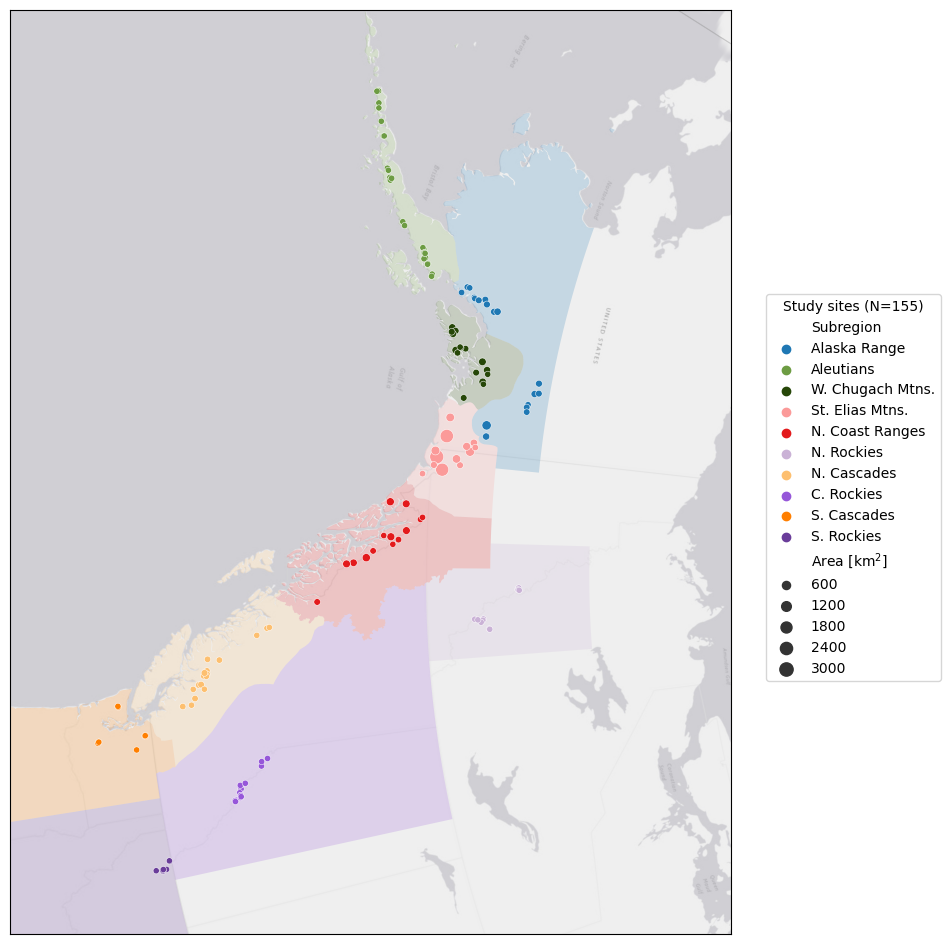

figure saved to file: /Users/raineyaberle/Google Drive/My Drive/Research/CryoGARS-Glaciology/Advising/student-research/Alexandra-Friel/snow_cover_mapping_application/study-sites/../snow-cover-mapping-application/figures/study_sites.png


In [21]:
plot_subregion_outlines = True

fig = plt.figure(figsize=(12,12))
ax = plt.subplot(1, 1, 1)
crs = 'EPSG:9822' # Albers Equal Conic projection
rgi_reproj = rgi.to_crs(crs)

# reproject aois to crs
aois_reproj = aois.to_crs(crs)
# change name of area column for displaying
aois_reproj.rename(columns={'Area':'Area [km$^2$]'}, inplace=True)
# add geometry centroid coordinates
aois_reproj['centroid_x'] = [x.centroid.coords.xy[0][0] for x in aois_reproj['geometry']]
aois_reproj['centroid_y'] = [x.centroid.coords.xy[1][0] for x in aois_reproj['geometry']]
aois_reproj[['Subregion', 'Color']] = ['', '']
# grab subregion names and colors
for o1region, o2region in unique_subregions:
    # determine subregion name and color for plotting
    subregion_name, color = f.determine_subregion_name_color(o1region, o2region)
    # add columns to dataframe
    aois_reproj.loc[(aois_reproj['O1Region']==o1region) & (aois_reproj['O2Region']==o2region), 'Subregion'] = subregion_name
    aois_reproj.loc[(aois_reproj['O1Region']==o1region) & (aois_reproj['O2Region']==o2region), 'Color'] = color
    # plot subregion outlines
    if plot_subregion_outlines:
        rgi_subregion = rgi_reproj.loc[(rgi_reproj['o1region']==o1region) & (rgi_reproj['o2region']==o2region)]
        rgi_subregion.plot(ax=ax, facecolor=color, edgecolor='None', alpha=0.2)

# plot geometry centroids
sns.scatterplot(data=aois_reproj, x='centroid_x', y='centroid_y', hue='Subregion', size='Area [km$^2$]',
                sizes=(20,100), palette=dict(aois_reproj[['Subregion', 'Color']].drop_duplicates().values))     


if plot_subregion_outlines:
    ax.set_xlim(-5200000, -2000000)
    ax.set_ylim(6700000, 10800000)
ax.set_xticks([])
ax.set_yticks([])
ax.set_ylabel('')
ax.set_xlabel('')
if plot_subregion_outlines:
    location = [1.1, 0.5, 0.2, 0.2]
else:
    location = [1.4, 0.5, 0.2, 0.2]
ax.legend(loc='upper right', bbox_to_anchor=location, 
          title='Study sites (N=' + str(len(aois)) + ')')
# add basemap
ctx.add_basemap(ax=ax, source=ctx.providers.Esri.WorldGrayCanvas, crs=crs, attribution=False)
plt.show()

# save figure
if save_figures:
    if plot_subregion_outlines:
        fig_fn = os.path.join(figures_out_path, 'study_sites.png')
    else:
        fig_fn = os.path.join(figures_out_path, 'study_sites_no_o2regions.png')
    fig.savefig(fig_fn, dpi=300, bbox_inches='tight')
    print('figure saved to file: ' + fig_fn)

In [ ]:
# Plot just o2regions
fig = plt.figure(figsize=(12,12))
ax = plt.subplot(1, 1, 1)
crs = 'EPSG:9822' # Albers Equal Conic projection
rgi_reproj = rgi.to_crs(crs)

# iterate over subregions
i=0
for o1region, o2region in unique_subregions:
    # determine subregion name and color for plotting
    subregion_name, color = f.determine_subregion_name_color(o1region, o2region)
    # plot subregion outline
    rgi_subregion = rgi_reproj.loc[(rgi_reproj['o1region']==o1region) & (rgi_reproj['o2region']==o2region)].reset_index(drop=True)
    rgi_subregion.plot(ax=ax, facecolor=color, edgecolor=color, alpha=0.5, label=subregion_name)

    i+=1

ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim(-5200000, -2000000)
ax.set_ylim(6700000, 10800000)
ax.set_ylim()
# add basemap
ctx.add_basemap(ax=ax, source=ctx.providers.Esri.WorldGrayCanvas, crs=crs, attribution=False)
plt.show()

# save figure
if save_figures:
    fig_fn = os.path.join(figures_out_path, 'rgi_o2regions.png')
    fig.savefig(fig_fn, dpi=300, bbox_inches='tight')
    print('figure saved to file: ' + fig_fn)

## Distribution of terrain parameters w.r.t. all sites in RGI regions 1 and 2

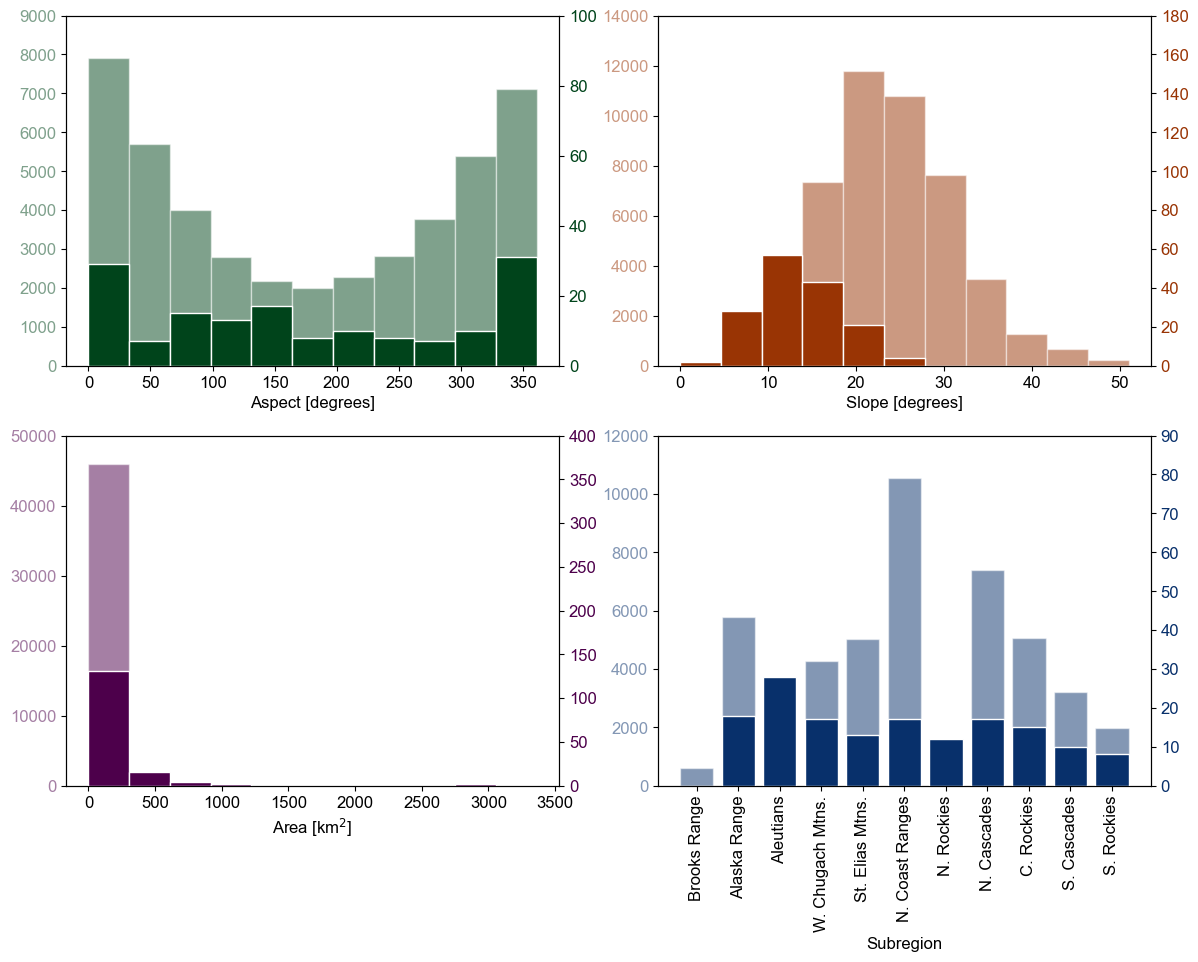

figure saved to file: /Users/raineyaberle/Google Drive/My Drive/Research/CryoGARS-Glaciology/Advising/student-research/Alexandra-Friel/snow_cover_mapping_application/study-sites/../snow-cover-mapping-application/figures/study_sites_terrain_parameters.png


In [42]:
# -----Plot distribution of terrain parameters for all glaciers and completed glaciers in each subregion
# Add column for subregion name
aois['Subregion'] = ''
rgis['Subregion'] = ''
for o1region, o2region in rgis[['O1Region', 'O2Region']].drop_duplicates().values:
    subregion_name, color = f.determine_subregion_name_color(o1region, o2region)
    aois.loc[(aois['O1Region']==o1region) & (aois['O2Region']==o2region), 'Subregion'] = subregion_name
    rgis.loc[(rgis['O1Region']==o1region) & (rgis['O2Region']==o2region), 'Subregion'] = subregion_name
# define columns and plot settings
columns = ['Aspect', 'Slope', 'Area', 'Subregion']
column_units = [' [degrees]', ' [degrees]', ' [km$^2$]', '']
colors = ['#00441b', '#993404', '#4d004b', '#08306b']
bins = [np.linspace(0, 361, num=12),
        np.linspace(0, 51, num=12),
        np.linspace(0, np.nanmax(rgis['Area']), num=12),
        np.arange(0,len(unique_subregions))]
plt.rcParams.update({'font.size': 12, 'font.sans-serif':'Arial'})
fig, ax = plt.subplots(2, 2, figsize=(14,10))
ax = ax.flatten()
# iterate over columns
for column, column_unit, color, bin, i in list(zip( columns, column_units, colors, bins, np.arange(0,len(columns)) )):
    if column=='Subregion':
        rgi_counts = np.zeros(len(rgis['Subregion'].drop_duplicates().values))
        aoi_counts = np.zeros(len(rgis['Subregion'].drop_duplicates().values))
        for j, subregion in enumerate(rgis['Subregion'].drop_duplicates().values):
            rgi_counts[j] = len(rgis.loc[rgis['Subregion']==subregion])
            aoi_counts[j] = len(aois.loc[aois['Subregion']==subregion])
        # plot
        ax[i].bar(np.arange(0,len(rgis['Subregion'].drop_duplicates().values)), 
                  rgi_counts, facecolor=color, edgecolor='white', alpha=0.5)
        ax2 = ax[i].twinx()
        ax2.bar(np.arange(0,len(rgis['Subregion'].drop_duplicates().values)), 
                aoi_counts, facecolor=color, edgecolor='white')
        ax[i].set_xticks(np.arange(0,len(rgis['Subregion'].drop_duplicates().values)))
        ax[i].set_xticklabels(rgis['Subregion'].drop_duplicates().values, rotation=90)
    else:
        bin_centers = [(bin[j+1] + bin[j])/2 for j in np.arange(0, len(bin)-1)]
        rgi_counts = np.zeros(len(bin_centers))
        aoi_counts = np.zeros(len(bin_centers))
        # iterate over bins
        for j in np.arange(0,len(bin)-1):
            # determine RGI outlines in aspect bin
            rgi_bin = rgis.loc[(rgis[column] >= bin[j]) & (rgis[column] < bin[j+1])]
            rgi_counts[j] = len(rgi_bin)
            # determine completed sites in aspect bin
            aoi_bin = aois.loc[(aois[column] >= bin[j]) & (aois[column] < bin[j+1])]
            aoi_counts[j] = len(aoi_bin)
        # plot
        ax[i].bar(bin_centers, rgi_counts, width=(bin[1]-bin[0]), facecolor=color, edgecolor='white', alpha=0.5)
        ax2 = ax[i].twinx()
        ax2.bar(bin_centers, aoi_counts, width=(bin[1]-bin[0]), facecolor=color, edgecolor='white')
    ax[i].set_yticks(ax[i].get_yticks())
    ax[i].set_yticklabels(ax[i].get_yticklabels(), color=color, alpha=0.5)
    ax[i].set_xlabel(column + column_unit)
    ax2.set_ylim(0, np.nanmax(aoi_counts)*3)
    ax2.set_yticks(ax2.get_yticks())
    ax2.set_yticklabels(ax2.get_yticklabels(), color=color)

plt.show()

# save figure
if save_figures:
    fig_fn = os.path.join(figures_out_path, 'study_sites_terrain_parameters.png')
    fig.savefig(fig_fn, dpi=300, bbox_inches='tight')
    print('figure saved to file: ' + fig_fn)

### Plot all AARs, ELAs from AARs, and median snowline elevations on one figure with colors distinguishing subregions

In [ ]:
plt.rcParams.update({'font.size':16})
fig1, ax1 = plt.subplots(1,1,figsize=(16,8)) # AARs
fig2, ax2 = plt.subplots(1,1,figsize=(16,8)) # ELAs from AARs

# iterate over unique subregions
i=0
for o1region, o2region in unique_subregions:
    # grab aois in subregion
    aois_subregion = aois.loc[(aois['O1Region']==o1region) & (aois['O2Region']==o2region)].reset_index(drop=True)
    # grab RGI IDs in subregion
    ids_subregion = aois_subregion['RGIId']
    # grab snowlines with matching names
    snowlines_subregion = training_data_df[training_data_df['site_name'].isin(ids_subregion)]
    # determine subregion name and color for plotting
    subregion_name, color = f.determine_subregion_name_color(o1region, o2region)
    # iterate over AOIs in subregion
    for j in range(0, len(aois_subregion)):
        # plot dummy point for legend
        if j==0:
            label = subregion_name + ' (N=' + str(len(aois_subregion)) + ')'
            ax1.plot(np.datetime64('2000-01-01'),
                     snowlines_subregion['AAR'].values[0], 'o',
                     markeredgewidth=3, markeredgecolor=color, markerfacecolor='None',
                     markersize=10, label=label)
            ax2.plot(np.datetime64('2000-01-01'),
                     snowlines_subregion['ELA_from_AAR_m'].values[0], 'o',
                     markeredgewidth=3, markeredgecolor=color, markerfacecolor='None',
                     markersize=10, label=label)
        # plot time series
        ax1.plot(snowlines_subregion['Date'],
                 snowlines_subregion['AAR'], 'o',
                 markeredgecolor=color, markerfacecolor='None', markersize=2)
        ax2.plot(snowlines_subregion['Date'],
                 snowlines_subregion['ELA_from_AAR_m'], 'o',
                 markeredgecolor=color, markerfacecolor='None', markersize=2)

    i+=1

# adjust axes
for ax in [ax1, ax2]:
    ax.grid()
    ax.set_xlim(np.datetime64('2013-04-01'), np.datetime64('2023-11-01'))
    ax.legend(loc='center left', bbox_to_anchor=[1.0, 0.4, 0.2, 0.2])
ax1.set_ylabel('AAR')
ax2.set_ylabel('ELA from AAR [m]')
plt.show()

# save figure
if save_figures:
    fig1_fn = os.path.join(figures_out_path, 'timeseries_AARs.png')
    fig1.savefig(fig1_fn, dpi=300, bbox_inches='tight')
    print('figure 1 saved to file: ' + fig1_fn)
    fig2_fn = os.path.join(figures_out_path, 'timeseries_ELAs_from_AARs.png')
    fig2.savefig(fig2_fn, dpi=300, bbox_inches='tight')
    print('figure 2 saved to file: ' + fig2_fn)

## Plot median monthly trends for each subregion

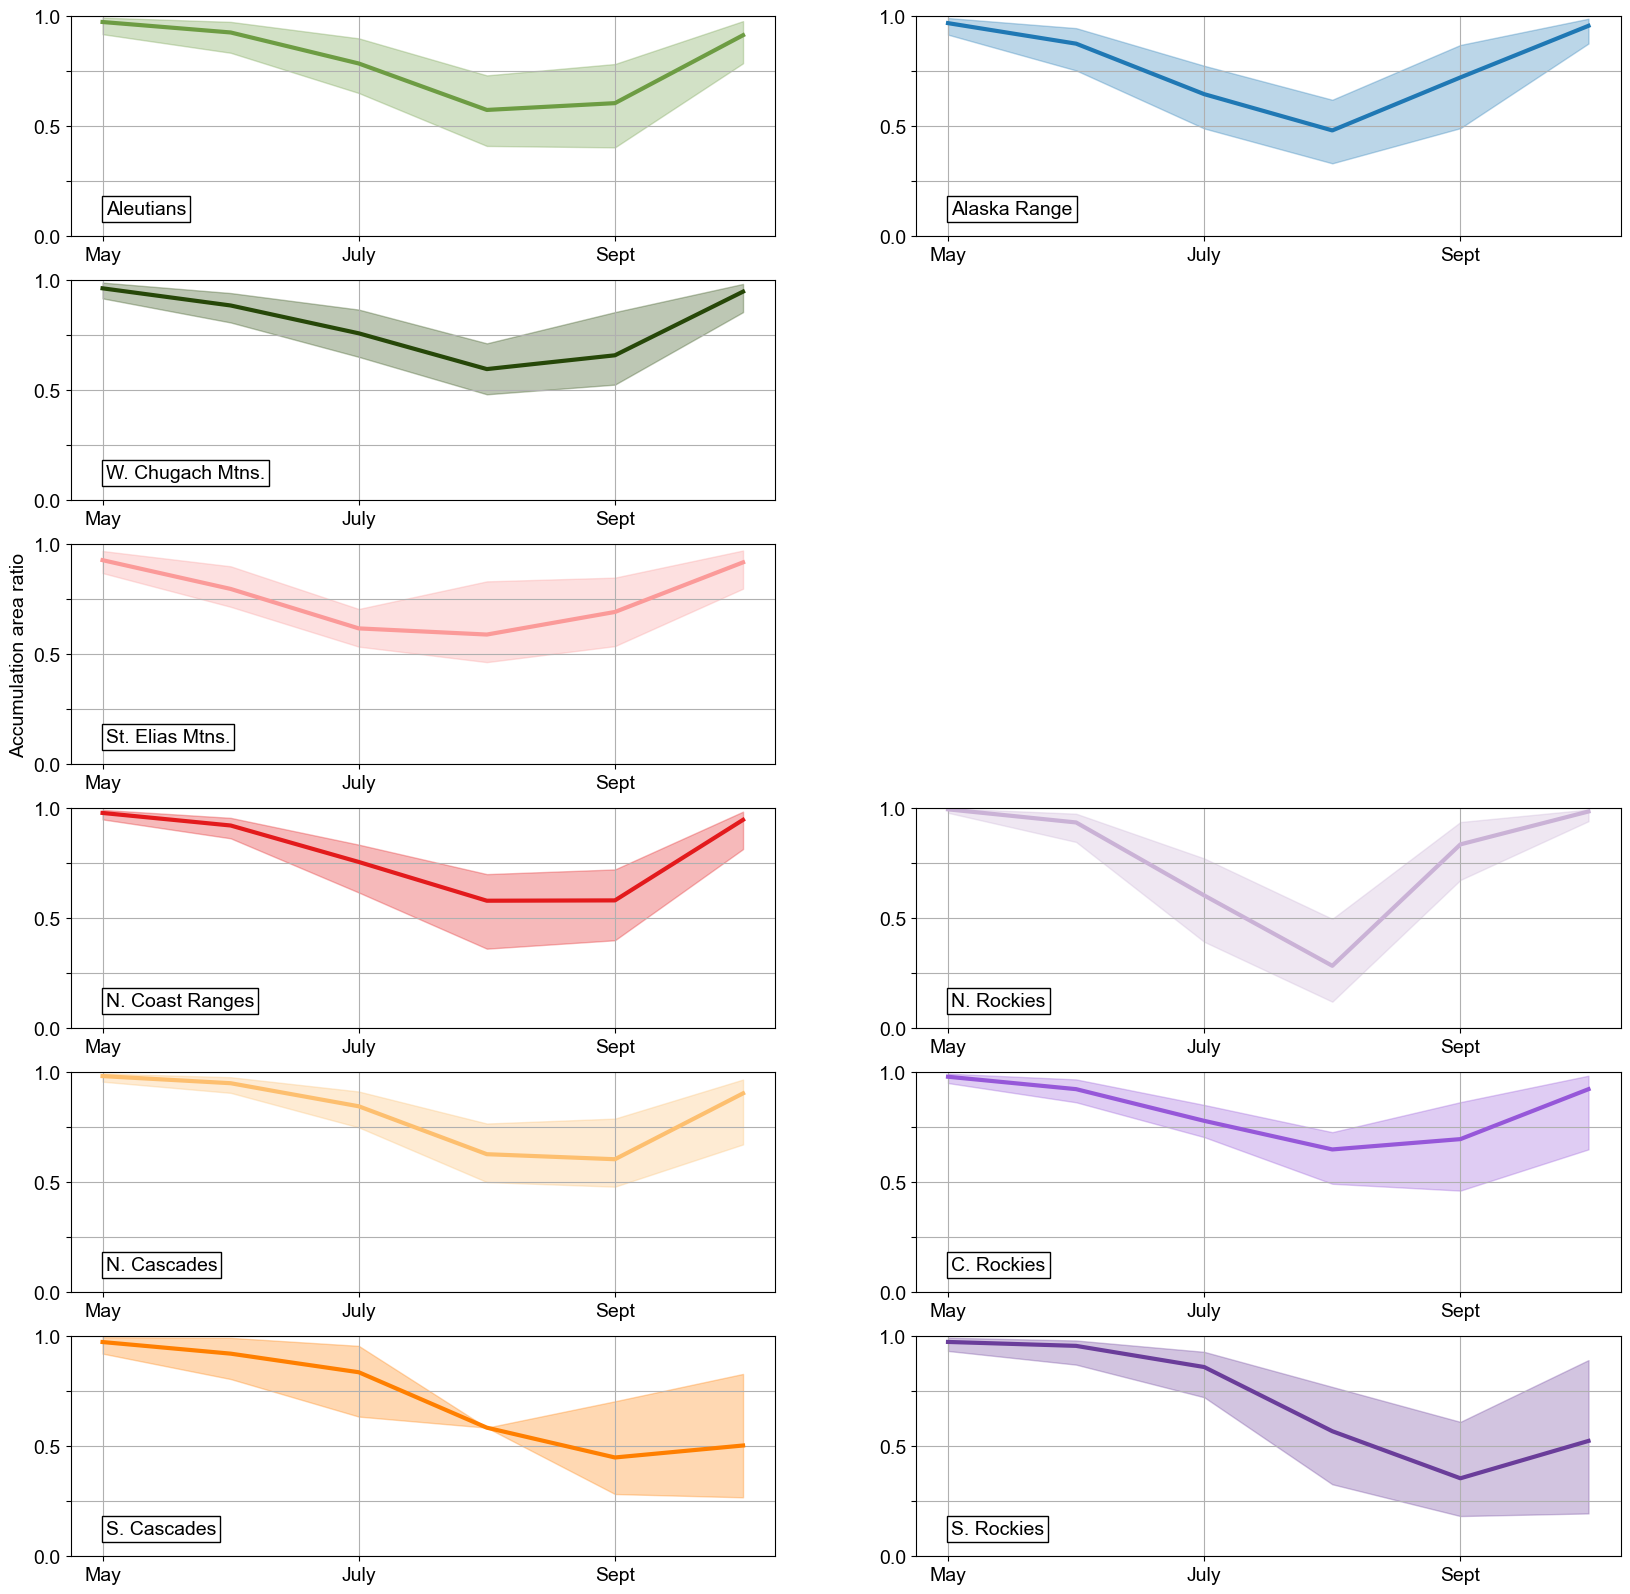

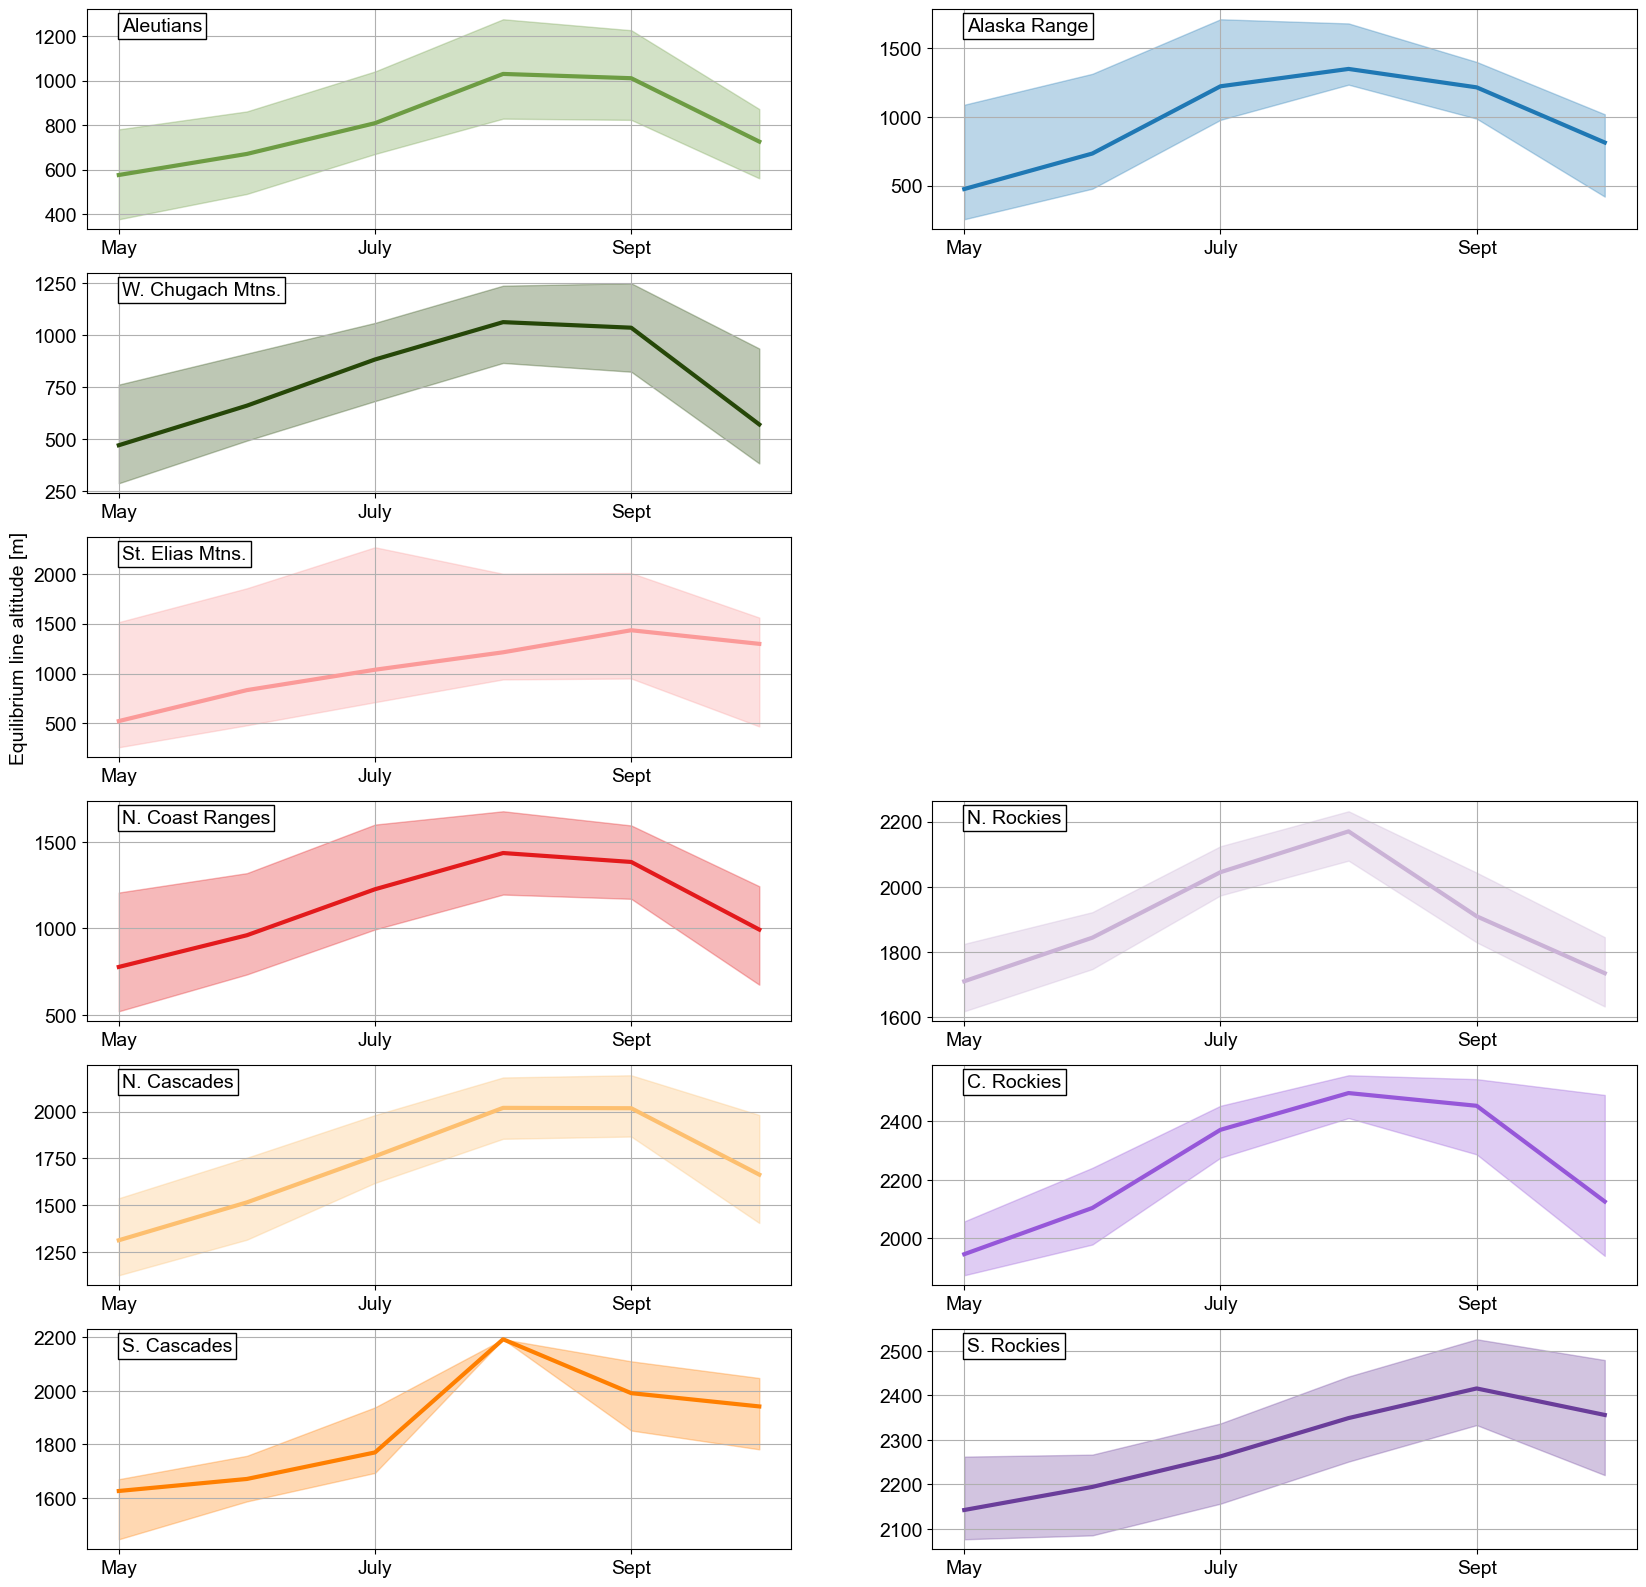

figure 1 saved to file: /Users/raineyaberle/Google Drive/My Drive/Research/CryoGARS-Glaciology/Advising/student-research/Alexandra-Friel/snow_cover_mapping_application/study-sites/../snow-cover-mapping-application/figures/timeseries_monthly_AARs.png
figure 2 saved to file: /Users/raineyaberle/Google Drive/My Drive/Research/CryoGARS-Glaciology/Advising/student-research/Alexandra-Friel/snow_cover_mapping_application/study-sites/../snow-cover-mapping-application/figures/timeseries_monthly_ELAs.png


In [43]:
# -----Set up figures
plt.rcParams.update({'font.size':14, 'font.sans-serif':'Arial'})
fig1, ax1 = plt.subplots(6, 2, figsize=(20, 20))  # AARs
ax1 = ax1.flatten()
fig2, ax2 = plt.subplots(6, 2, figsize=(20, 20))  # ELAs from AARs
ax2 = ax2.flatten()
alpha = 0.3 # transparency of IQR range
linewidth = 3  # line width for median trend

# -----Iterate over subregions
for o1region, o2region in unique_subregions:
    
    # grab aois in subregion
    aois_subregion = aois.loc[(aois['O1Region']==o1region) & (aois['O2Region']==o2region)].reset_index(drop=True)
    # grab RGI IDs in subregion
    ids_subregion = aois_subregion['RGIId']
    # grab snowlines with matching names
    snowlines_subregion = training_data_df[training_data_df['site_name'].isin(ids_subregion)]
    # determine subregion name and color for plotting
    subregion_name, color = f.determine_subregion_name_color(o1region, o2region)

    # determine which axis to plot on
    if (o1region==1) and (o2region==2):
        j = 1
    elif (o1region==1) and (o2region==3):
        j = 0
    elif (o1region==1) and (o2region==4):
        j = 2
    elif (o1region==1) and (o2region==5):
        j = 4
    elif (o1region==1) and (o2region==6):
        j = 6
    elif (o1region==2) and (o2region==1):
        j = 7
    elif (o1region==2) and (o2region==2):
        j = 8
    elif (o1region==2) and (o2region==3):
        j = 9
    elif (o1region==2) and (o2region==4):
        j = 10
    elif (o1region==2) and (o2region==5):
        j = 11
    
    # -----Calculate median and quartiles for Sentinel-2 weekly trends
    q1, q3 = 0.25, 0.75
    # Extract the week of the year and calculate median and IQR
    snowlines_subregion.index = snowlines_subregion.Date
    # iterate over columns
    for ax, column in list(zip([ax1, ax2], ['AAR', 'ELA_from_AAR_m'])):
        # calculate monthly median trend
        monthly = snowlines_subregion.groupby(snowlines_subregion.index.month)[column].agg(['median', lambda x: x.quantile(q1), lambda x: x.quantile(q3)])
        monthly.columns = ['Median', 'Q1', 'Q3']  # Rename the columns for clarity
        # plot
        ax[j].fill_between(monthly.index, monthly['Q1'], monthly['Q3'], color=color, alpha=alpha)
        ax[j].plot(monthly.index, monthly['Median'], color=color, linewidth=linewidth, label=subregion_name)
        ax[j].set_xticks([5, 7, 9])
        ax[j].set_xticklabels(['May', 'July', 'Sept'])
        # ax[i].legend(loc='center left', bbox_to_anchor=[1.0, 0.4, 0.2, 0.2])
        ax[j].grid(True)

    # -----Adjust individual axes
    # AARs
    ax1[j].set_ylim(0,1)
    ax1[j].set_yticks([0, 0.25, 0.5, 0.75, 1.0])
    ax1[j].set_yticklabels(['0.0', '', '0.5', '', '1.0'])
    ax1[j].text((ax1[j].get_xlim()[1] - ax1[j].get_xlim()[0])*0.05 + ax1[j].get_xlim()[0], 
                (ax1[j].get_ylim()[1] - ax1[j].get_ylim()[0])*0.10 + ax1[j].get_ylim()[0],
                subregion_name, bbox=dict(facecolor='white', edgecolor='black', pad=3))
    # ELAs
    ax2[j].text((ax2[j].get_xlim()[1] - ax2[j].get_xlim()[0])*0.05 + ax2[j].get_xlim()[0], 
                (ax2[j].get_ylim()[1] - ax2[j].get_ylim()[0])*0.90 + ax2[j].get_ylim()[0],
                subregion_name, bbox=dict(facecolor='white', edgecolor='black', pad=3))    
    if j==4:
        ax1[j].set_ylabel('Accumulation area ratio')
        ax2[j].set_ylabel('Equilibrium line altitude [m]')

# remove empty axes
for fig, ax in list(zip([fig1, fig2], [ax1, ax2])):
    fig.delaxes(ax[3])
    fig.delaxes(ax[5])

plt.show()
    
# -----Save figures
if save_figures:
    fig1_fn = os.path.join(figures_out_path, 'timeseries_monthly_AARs.png')
    fig1.savefig(fig1_fn, dpi=300, facecolor='w', edgecolor='none', bbox_inches='tight')
    print('figure 1 saved to file: ' + fig1_fn)
    fig2_fn = os.path.join(figures_out_path, 'timeseries_monthly_ELAs.png')
    fig2.savefig(fig2_fn, dpi=300, facecolor='w', edgecolor='none', bbox_inches='tight')
    print('figure 2 saved to file: ' + fig2_fn)

## Plot weekly median trends for each subregion separately

/var/folders/9h/sg2rw9f10lq5jmfch9hnj6gc0000gq/T/ipykernel_32174/3304936961.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  snowlines_subregion['Week'] = snowlines_subregion['Date'].dt.isocalendar().week
/var/folders/9h/sg2rw9f10lq5jmfch9hnj6gc0000gq/T/ipykernel_32174/3304936961.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  snowlines_subregion['Week'] = snowlines_subregion['Date'].dt.isocalendar().week
/var/folders/9h/sg2rw9f10lq5jmfch9hnj6gc0000gq/T/ipykernel_32174/3304936961.py:52: SettingWith

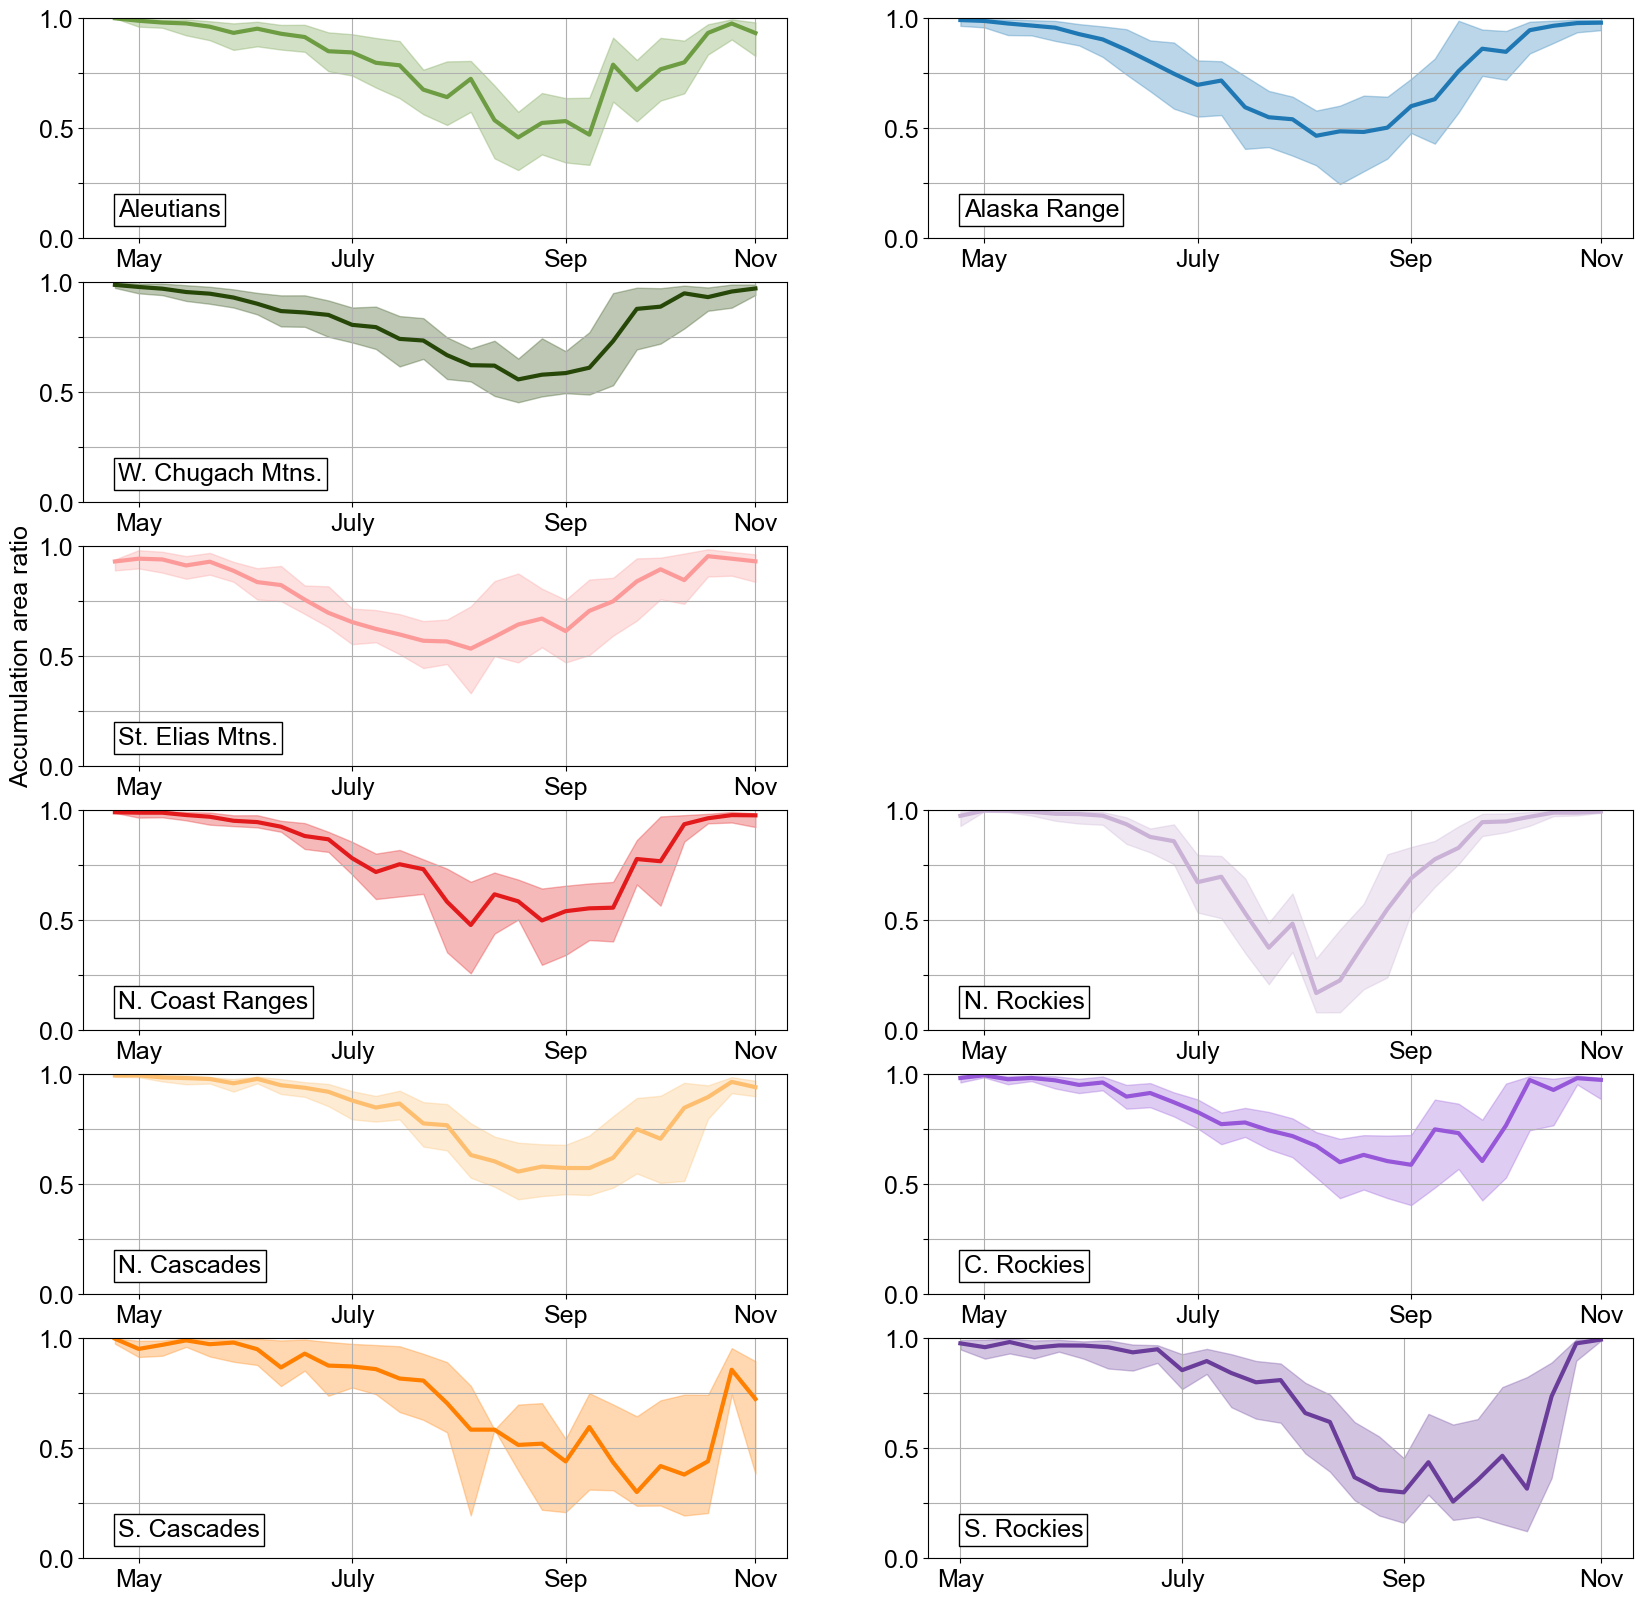

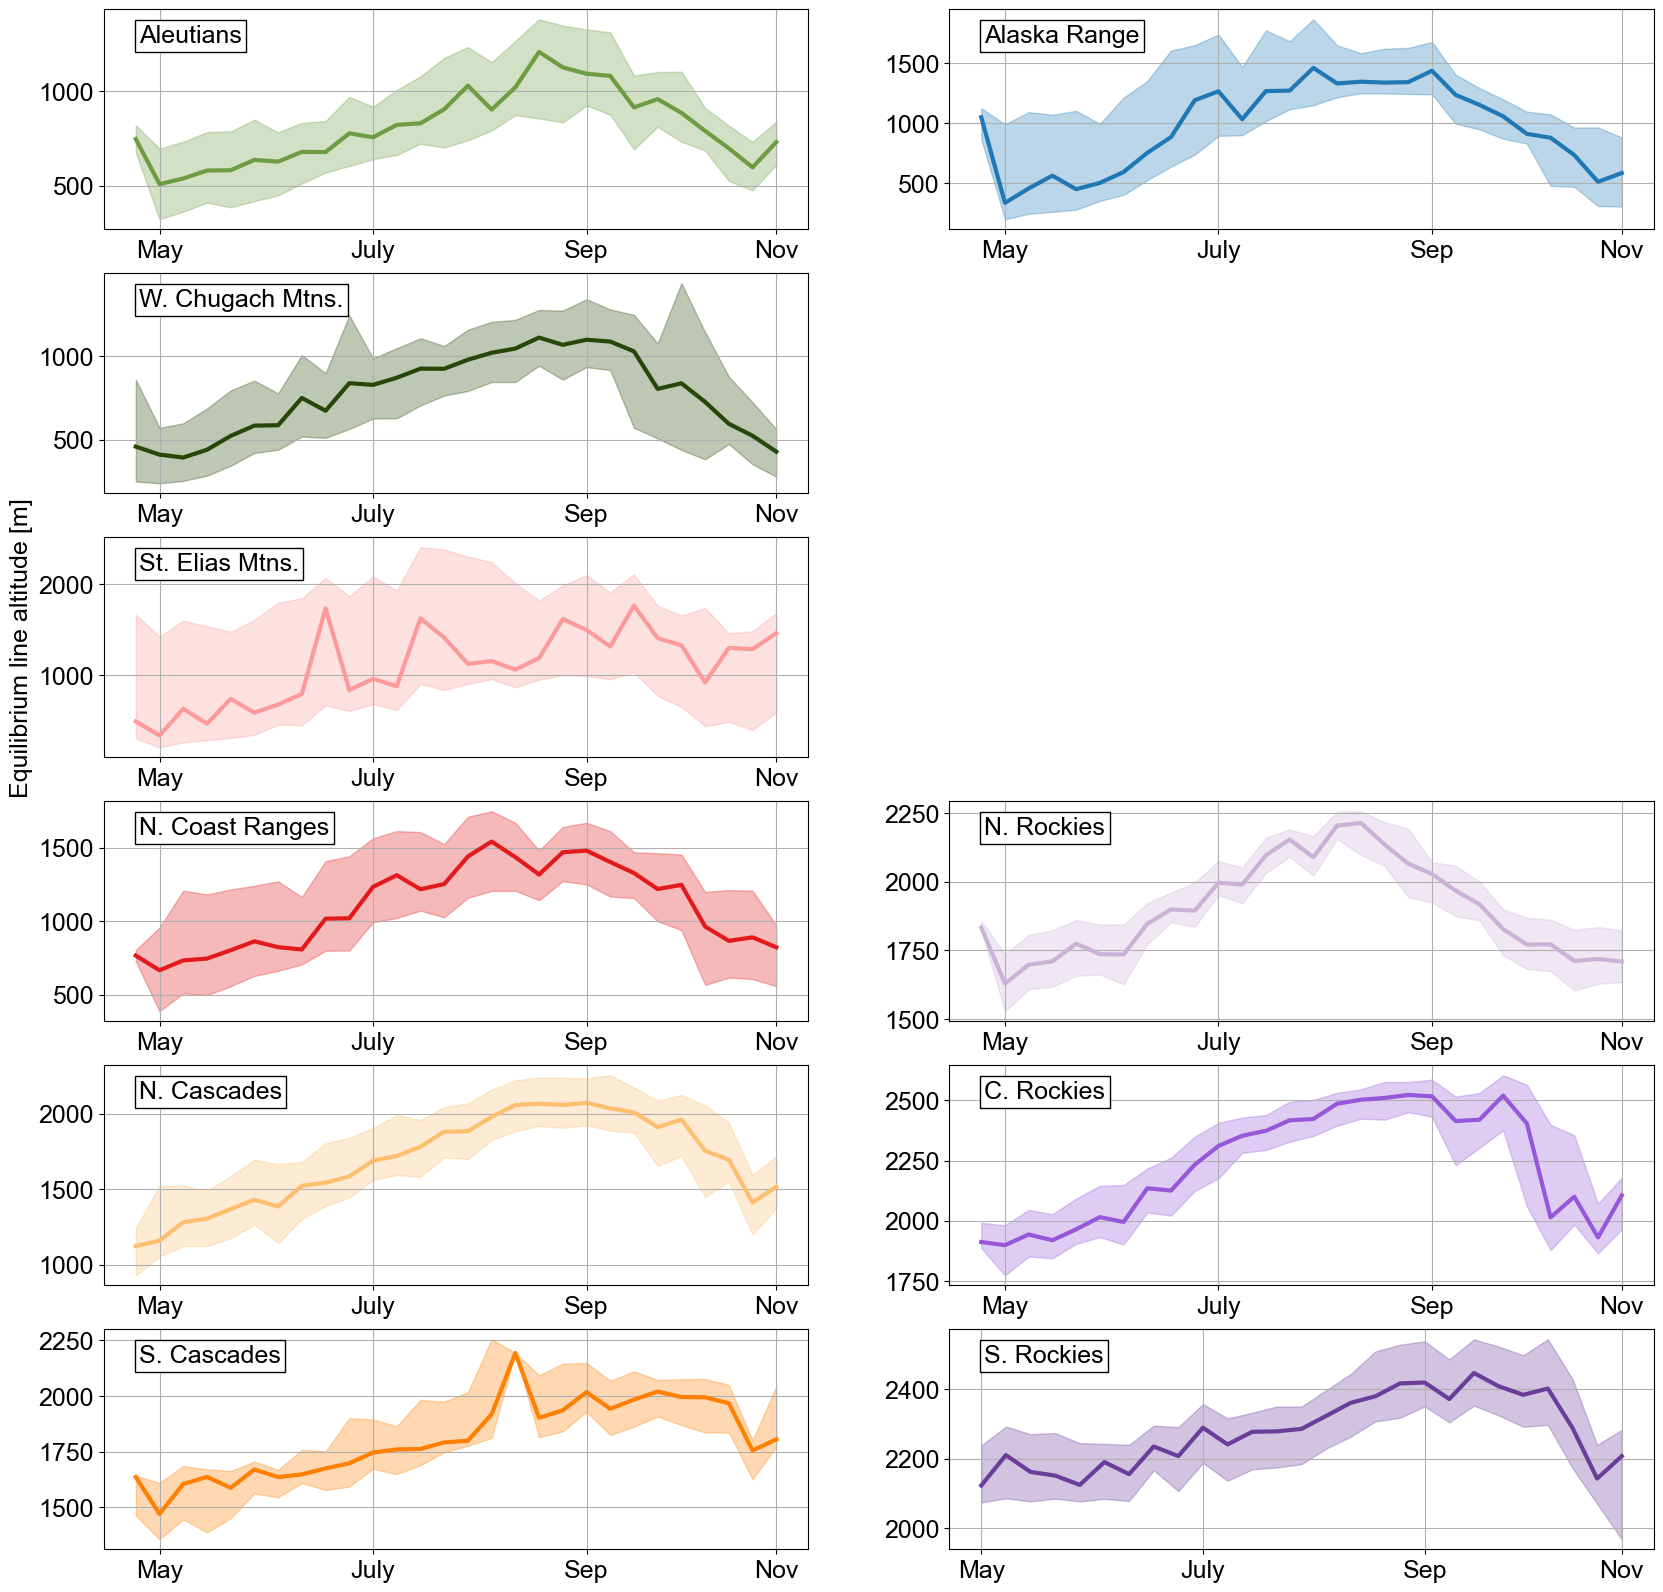

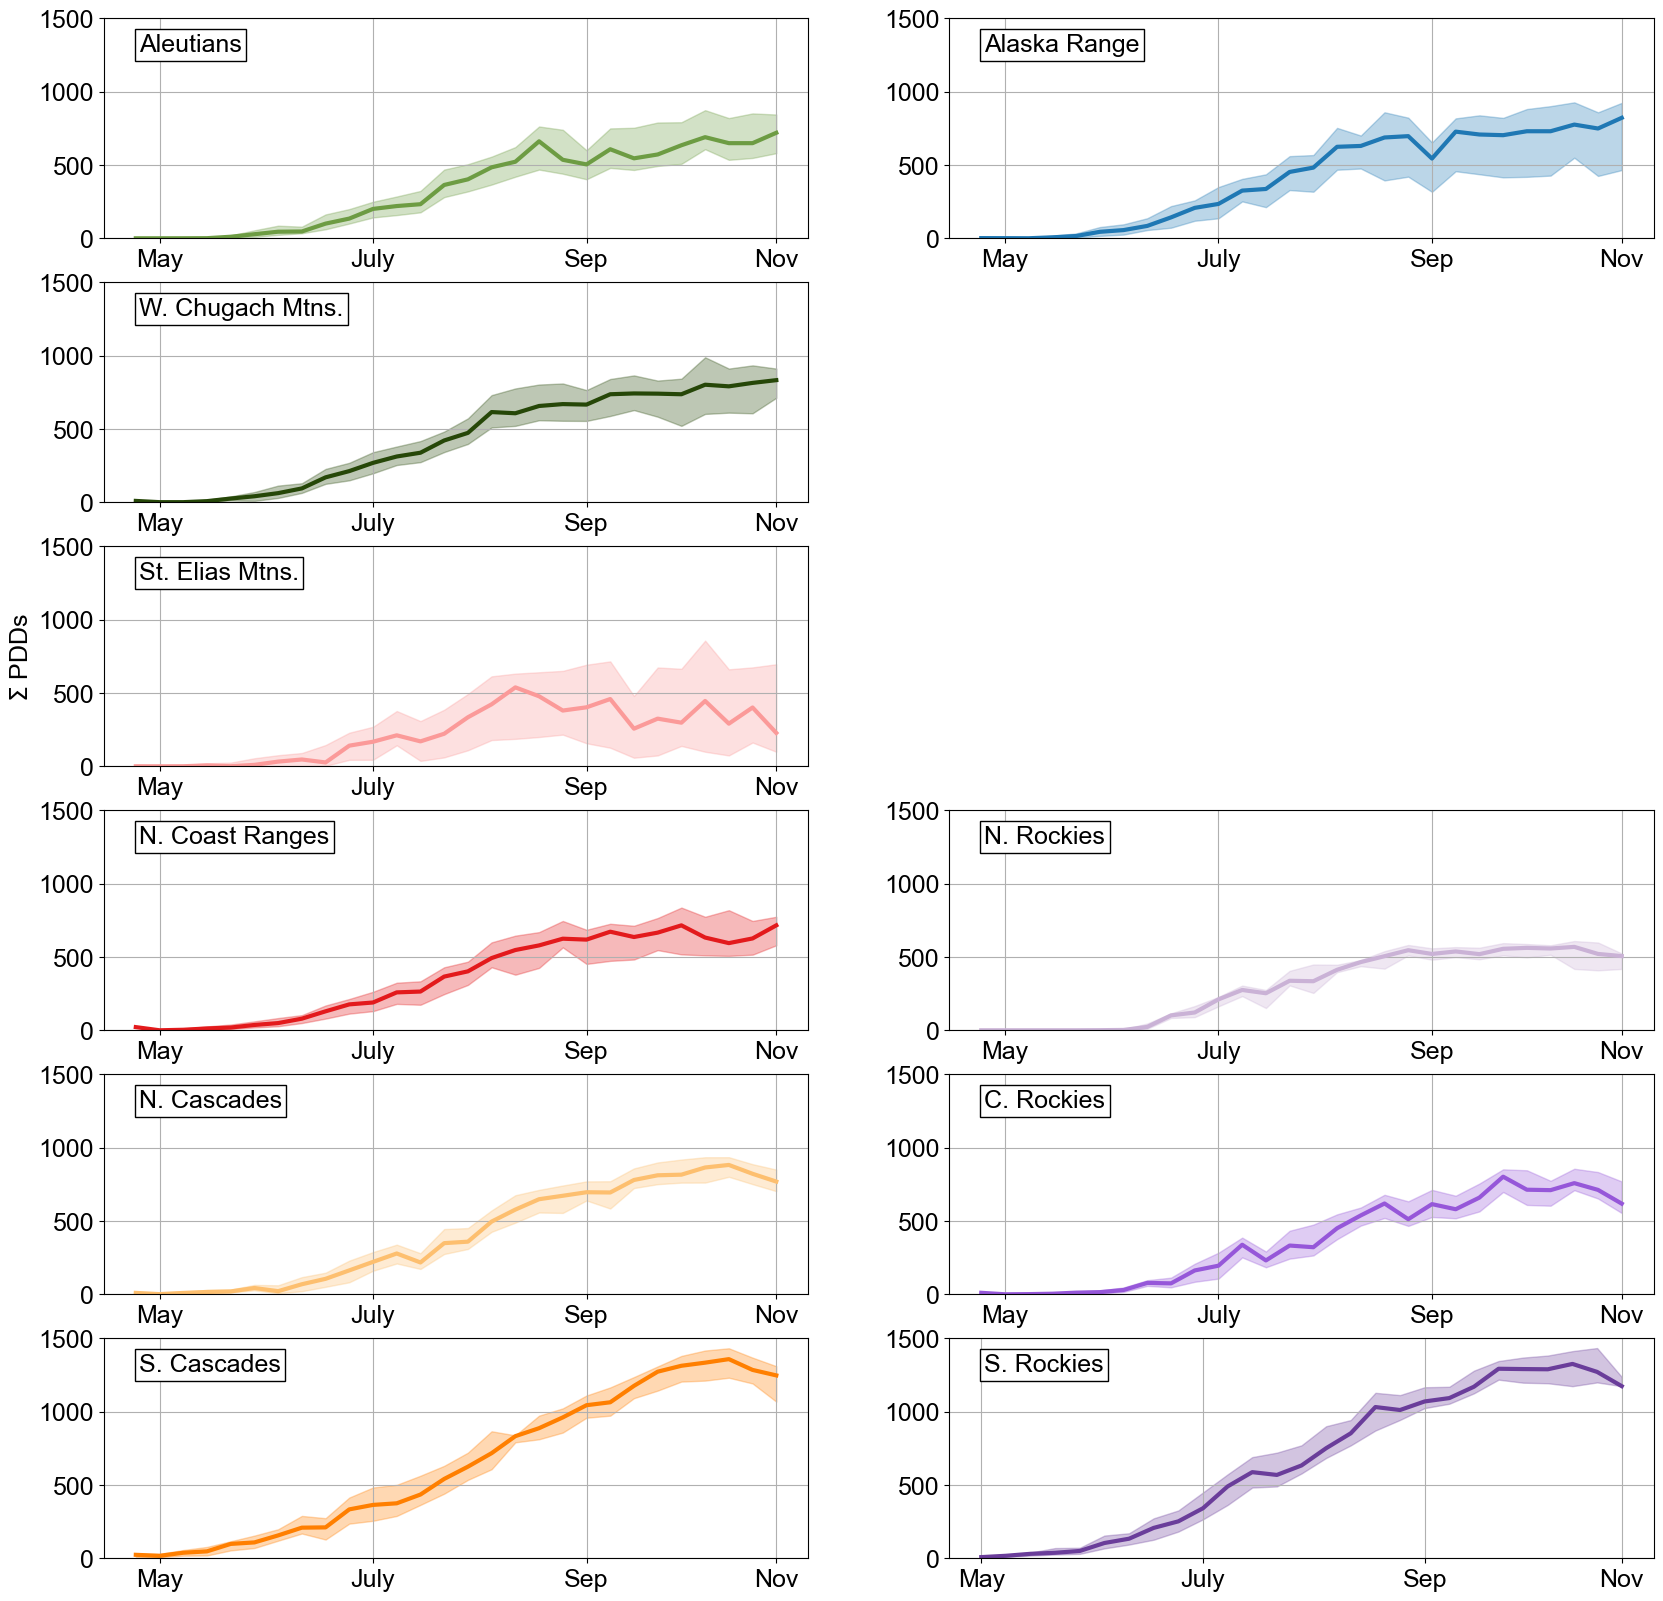

figure 1 saved to file: /Users/raineyaberle/Google Drive/My Drive/Research/CryoGARS-Glaciology/Advising/student-research/Alexandra-Friel/snow_cover_mapping_application/study-sites/../snow-cover-mapping-application/figures/timeseries_weekly_AARs.png
figure 2 saved to file: /Users/raineyaberle/Google Drive/My Drive/Research/CryoGARS-Glaciology/Advising/student-research/Alexandra-Friel/snow_cover_mapping_application/study-sites/../snow-cover-mapping-application/figures/timeseries_weekly_ELAs.png
figure 3 saved to file: /Users/raineyaberle/Google Drive/My Drive/Research/CryoGARS-Glaciology/Advising/student-research/Alexandra-Friel/snow_cover_mapping_application/study-sites/../snow-cover-mapping-application/figures/timeseries_weekly_PDD_sums.png


In [44]:
# -----Set up figures
plt.rcParams.update({'font.size':18, 'font.sans-serif':'Arial'})
fig1, ax1 = plt.subplots(6, 2, figsize=(20, 20))  # AARs
ax1 = ax1.flatten()
fig2, ax2 = plt.subplots(6, 2, figsize=(20, 20))  # ELAs from AARs
ax2 = ax2.flatten()
fig3, ax3 = plt.subplots(6, 2, figsize=(20, 20))  # cumulative PDDs
ax3 = ax3.flatten()
alpha = 0.3 # transparency of IQR range
linewidth = 3  # line width for median trend

# -----Iterate over subregions
min_aars_df, max_elas_df = pd.DataFrame(), pd.DataFrame()
for o1region, o2region in unique_subregions:
    
    # grab aois in subregion
    aois_subregion = aois.loc[(aois['O1Region']==o1region) & (aois['O2Region']==o2region)].reset_index(drop=True)
    # grab RGI IDs in subregion
    ids_subregion = aois_subregion['RGIId']
    # grab snowlines with matching names
    snowlines_subregion = training_data_df[training_data_df['site_name'].isin(ids_subregion)]
    # determine subregion name and color for plotting
    subregion_name, color = f.determine_subregion_name_color(o1region, o2region)

    # determine which axis to plot on
    if (o1region==1) and (o2region==2):
        j = 1
    elif (o1region==1) and (o2region==3):
        j = 0
    elif (o1region==1) and (o2region==4):
        j = 2
    elif (o1region==1) and (o2region==5):
        j = 4
    elif (o1region==1) and (o2region==6):
        j = 6
    elif (o1region==2) and (o2region==1):
        j = 7
    elif (o1region==2) and (o2region==2):
        j = 8
    elif (o1region==2) and (o2region==3):
        j = 9
    elif (o1region==2) and (o2region==4):
        j = 10
    elif (o1region==2) and (o2region==5):
        j = 11
        
    # -----Calculate median and quartiles for Sentinel-2 weekly trends
    q1, q3 = 0.25, 0.75
    # Set datetime as index
    snowlines_subregion.index = snowlines_subregion.Date
    # add week of year column
    snowlines_subregion['Week'] = snowlines_subregion['Date'].dt.isocalendar().week
    # iterate over columns
    for ax, column in list(zip([ax1, ax2, ax3], ['AAR', 'ELA_from_AAR_m', 'Cumulative_Positive_Degree_Days'])):
        # calculate weekly trends
        weekly = snowlines_subregion.groupby(by='Week')[column].agg(['median', lambda x: x.quantile(q1), lambda x: x.quantile(q3)])
        weekly.columns = ['Median', 'Q1', 'Q3'] # Rename the columns for clarity
        weekly.index = weekly.index.astype(float)
        # plot
        ax[j].fill_between(weekly.index, weekly['Q1'], weekly['Q3'], color=color, alpha=alpha)
        ax[j].plot(weekly.index, weekly['Median'], color=color, linewidth=linewidth, label=subregion_name)
        ax[j].set_xticks([18, 27, 36, 44])
        ax[j].set_xticklabels(['May', 'July', 'Sep', 'Nov'])
        ax[j].grid(True)
        # compile maximums in dataframe
        if column=='AAR':
            min_aar_df = pd.DataFrame({'Subregion': [subregion_name],
                                       'Week': weekly.loc[weekly['Median']==weekly['Median'].min()].index.values,
                                       'AAR min': weekly.loc[weekly['Median']==weekly['Median'].min()]['Median'].values,
                                       'Q1': weekly.loc[weekly['Median']==weekly['Median'].min()]['Q1'].values,
                                       'Q3': weekly.loc[weekly['Median']==weekly['Median'].min()]['Q3'].values,
                                       'Color': color
                                      })
            min_aars_df = pd.concat([min_aars_df, min_aar_df])
        elif column=='ELA_from_AAR_m':
            max_ela_df = pd.DataFrame({'Subregion': [subregion_name],
                                       'Week': weekly.loc[weekly['Median']==weekly['Median'].max()].index.values,
                                       'ELA max': weekly.loc[weekly['Median']==weekly['Median'].max()]['Median'].values,
                                       'Q1': weekly.loc[weekly['Median']==weekly['Median'].max()]['Q1'].values,
                                       'Q3': weekly.loc[weekly['Median']==weekly['Median'].max()]['Q3'].values,
                                       'Color': color
                                      })
            max_elas_df = pd.concat([max_elas_df, max_ela_df])
    
    # -----Adjust individual axes
    # AARs
    ax1[j].set_ylim(0,1)
    ax1[j].set_yticks([0, 0.25, 0.5, 0.75, 1.0])
    ax1[j].set_yticklabels(['0.0', '', '0.5', '', '1.0'])
    ax1[j].text((ax1[j].get_xlim()[1] - ax1[j].get_xlim()[0])*0.05 + ax1[j].get_xlim()[0], 
                (ax1[j].get_ylim()[1] - ax1[j].get_ylim()[0])*0.10 + ax1[j].get_ylim()[0],
                subregion_name, bbox=dict(facecolor='white', edgecolor='black', pad=3))
    # ELAs
    ax2[j].text((ax2[j].get_xlim()[1] - ax2[j].get_xlim()[0])*0.05 + ax2[j].get_xlim()[0], 
                (ax2[j].get_ylim()[1] - ax2[j].get_ylim()[0])*0.85 + ax2[j].get_ylim()[0],
                subregion_name, bbox=dict(facecolor='white', edgecolor='black', pad=3))  
    # PDD sums
    ax3[j].set_ylim(0,1500)
    ax3[j].set_yticks(np.arange(0, 1501, step=500))
    ax3[j].text((ax3[j].get_xlim()[1] - ax3[j].get_xlim()[0])*0.05 + ax3[j].get_xlim()[0], 
                (ax3[j].get_ylim()[1] - ax3[j].get_ylim()[0])*0.85 + ax3[j].get_ylim()[0],
                subregion_name, bbox=dict(facecolor='white', edgecolor='black', pad=3))
    if j==4:
        ax1[j].set_ylabel('Accumulation area ratio')
        ax2[j].set_ylabel('Equilibrium line altitude [m]')
        ax3[j].set_ylabel('$\Sigma$ PDDs')

# remove empty axes
for fig, ax in list(zip([fig1, fig2, fig3], [ax1, ax2, ax3])):
    fig.delaxes(ax[3])
    fig.delaxes(ax[5])
    
plt.show()
    
# -----Save figures
if save_figures:
    fig1_fn = os.path.join(figures_out_path, 'timeseries_weekly_AARs.png')
    fig1.savefig(fig1_fn, dpi=300, facecolor='w', edgecolor='none', bbox_inches='tight')
    print('figure 1 saved to file: ' + fig1_fn)
    fig2_fn = os.path.join(figures_out_path, 'timeseries_weekly_ELAs.png')
    fig2.savefig(fig2_fn, dpi=300, facecolor='w', edgecolor='none', bbox_inches='tight')
    print('figure 2 saved to file: ' + fig2_fn)
    fig3_fn = os.path.join(figures_out_path, 'timeseries_weekly_PDD_sums.png')
    fig3.savefig(fig3_fn, dpi=300, facecolor='w', edgecolor='none', bbox_inches='tight')
    print('figure 3 saved to file: ' + fig3_fn)

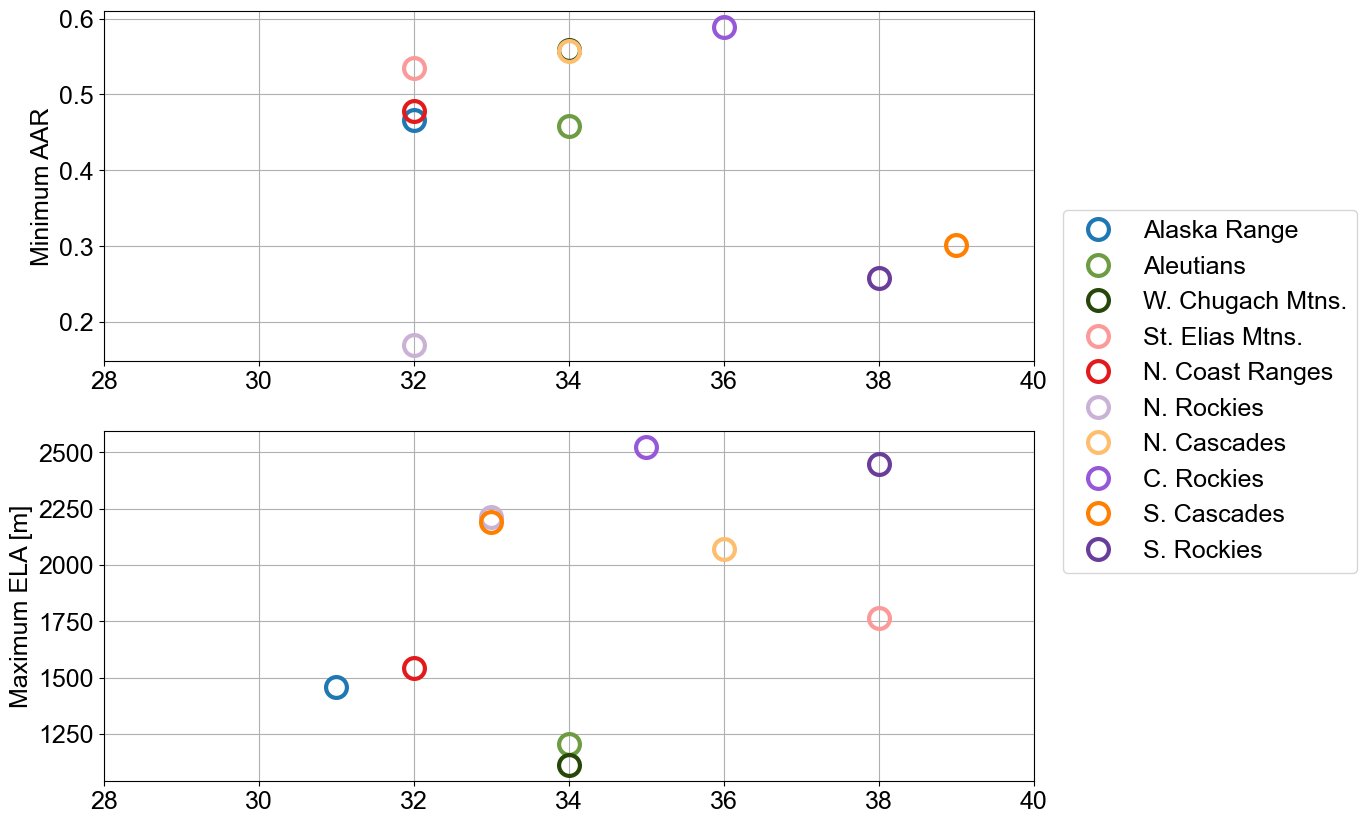

In [45]:
# plot maximum values
min_aars_df.reset_index(drop=True, inplace=True)
max_elas_df.reset_index(drop=True, inplace=True)

fig, ax = plt.subplots(2, 1, figsize=(12,10))
for subregion in min_aars_df['Subregion'].values:
    min_aars_subregion = min_aars_df.loc[min_aars_df['Subregion']==subregion]
    ax[0].plot(min_aars_subregion['Week'], min_aars_subregion['AAR min'],
               'o', markersize=15, markeredgecolor=min_aars_subregion['Color'].values[0], 
               markerfacecolor='None', markeredgewidth=3, label=subregion)
    max_elas_subregion = max_elas_df.loc[max_elas_df['Subregion']==subregion]
    ax[1].plot(max_elas_subregion['Week'], max_elas_subregion['ELA max'],
               'o', markersize=15, markeredgecolor=min_aars_subregion['Color'].values[0], 
               markerfacecolor='None', markeredgewidth=3, label=subregion)

xmin, xmax = 28, 40
ax[0].set_ylabel('Minimum AAR')
ax[0].grid()
ax[0].set_xlim(xmin, xmax)
ax[1].set_ylabel('Maximum ELA [m]')
ax[1].grid()
ax[1].set_xlim(xmin, xmax)
handles, labels = ax[1].get_legend_handles_labels()
leg = fig.legend(handles, labels, loc='center right', bbox_to_anchor=[0.98, 0.4, 0.2, 0.2])

plt.show()

In [ ]:
max_elas_df

In [ ]:
min_aars_df

In [ ]:
# -----Plot AAR & snowline timeseries for each subregion separately
plt.rcParams.update({'font.size':16, 'font.sans-serif':'Arial'})
fig1, ax1 = plt.subplots(len(unique_subregions), 2, gridspec_kw={'width_ratios':[4,1]}, figsize=(20,44))
fig2, ax2 = plt.subplots(len(unique_subregions), 2, gridspec_kw={'width_ratios':[4,1]}, figsize=(20,44))

alpha = 0.3 # transparency of IQR range
linewidth = 3  # line width for median trend

# grab unique subregions
unique_subregions = unique_subregion_counts[['O1Region', 'O2Region']].values
# iterate over unique subregions
i=0
for o1region, o2region in unique_subregions:
    # grab aois in subregion
    aois_subregion = aois.loc[(aois['O1Region']==o1region) & (aois['O2Region']==o2region)].reset_index(drop=True)
    # grab RGI IDs in subregion
    ids_subregion = aois_subregion['RGIId']
    # grab snowlines with matching names
    snowlines_subregion = training_data_df[training_data_df['site_name'].isin(ids_subregion)]
    # determine subregion name and color for plotting
    subregion_name, color = f.determine_subregion_name_color(o1region, o2region)

     # grab aois in subregion
    aois_subregion = aois.loc[(aois['O1Region']==o1region) & (aois['O2Region']==o2region)].reset_index(drop=True)
    # grab RGI IDs in subregion
    ids_subregion = aois_subregion['RGIId']
    # grab snowlines with matching names
    snowlines_subregion = training_data_df[training_data_df['site_name'].isin(ids_subregion)]
    
    # -----Calculate median and quartiles for Sentinel-2 weekly trends
    q1, q3 = 0.25, 0.75
    # Extract the week of the year and calculate median and IQR
    snowlines_subregion.index = snowlines_subregion.datetime
    # median snowline elevations
    snowlines_monthly = snowlines_subregion.groupby(snowlines_subregion.index.month)['snowline_elevs_median_m'].agg(['median', lambda x: x.quantile(q1), lambda x: x.quantile(q3)])
    snowlines_monthly.columns = ['Median', 'Q1', 'Q3'] # Rename the columns for clarity
    # AAR
    AAR_monthly = snowlines_subregion.groupby(snowlines_subregion.index.month)['AAR'].agg(['median', lambda x: x.quantile(q1), lambda x: x.quantile(q3)])
    AAR_monthly.columns = ['Median', 'Q1', 'Q3'] # Rename the columns for clarity
    
    # -----Plot results
    # median snowline elevations
    ax1[i,0].plot(snowlines_subregion['datetime'], snowlines_subregion['snowline_elevs_median_m'], '.', color=color)
    ax1[i,0].grid()
    ax1[i,0].set_title(subregion_name + ' (N=' + str(len(snowlines_subregion['site_name'].drop_duplicates())) + ')')
    ax1[i,1].fill_between(snowlines_monthly.index, snowlines_monthly['Q1'], snowlines_monthly['Q3'], color=color, alpha=alpha)
    ax1[i,1].plot(snowlines_monthly.index, snowlines_monthly['Median'], color=color, linewidth=linewidth, label=subregion_name)
    ax1[i,1].grid()
    ax1[i,1].set_xticks([5, 8, 10])
    ax1[i,1].set_xticklabels(['May', 'Aug', 'Oct'])
    # AAR
    ax3[i,0].plot(snowlines_subregion['datetime'], snowlines_subregion['AAR'], '.', color=color)
    ax3[i,0].grid()
    ax3[i,0].set_title(subregion_name + ' (N=' + str(len(snowlines_subregion['site_name'].drop_duplicates())) + ')')
    ax3[i,1].fill_between(AAR_monthly.index, AAR_monthly['Q1'], AAR_monthly['Q3'], color=color, alpha=alpha)
    ax3[i,1].plot(AAR_monthly.index, AAR_monthly['Median'], color=color, linewidth=linewidth, label=subregion_name)
    ax3[i,1].grid()
    ax3[i,1].set_xticks([5, 8, 10])
    ax3[i,1].set_xticklabels(['May', 'Aug', 'Oct'])

    i+=1

fig1.suptitle('Median snowline elevations', y=0.9)
fig2.suptitle('Accumulation area ratios', y=0.9)

plt.show()

# -----Save figures
# if save_figures:
#     fig1_fn = os.path.join(figures_out_path, 'time_series_median_snowline_elevations.png')
#     fig1.savefig(fig1_fn, dpi=300, bbox_inches='tight')
#     print('figure 1 saved to file: ' + fig1_fn)
#     fig2_fn = os.path.join(figures_out_path, 'time_series_AARs.png')
#     fig2.savefig(fig2_fn, dpi=300, bbox_inches='tight')
#     print('figure 2 saved to file: ' + fig2_fn)

## Plot timeseries with colors distinguishing terrain parameters

In [ ]:
# plot each subregion with colors differentiating aspect
import matplotlib
# define colormap for aspect
cmap = plt.cm.twilight_shifted

# iterate over unique subregions
for o1region, o2region in unique_subregions:
    # grab aois in subregion
    aois_subregion = aois.loc[(aois['O1Region']==o1region) & (aois['O2Region']==o2region)]
    # grab RGI IDs in subregion
    ids_subregion = aois_subregion['RGIId']
    # set up figure
    fig, ax = plt.subplots(1, 1, figsize=(12,6))
    # iterate over ids
    for ID in ids_subregion.values:
        site_aspect = aois.loc[aois['RGIId']==ID]['Aspect'].values[0]
        site_snowlines = training_data_df.loc[training_data_df['site_name']==ID]
        # plot
        ax.plot(site_snowlines['Date'], site_snowlines['AAR'],
                'o', markerfacecolor=cmap(site_aspect/360), markeredgecolor='k', markersize=5)
        ax.set_ylabel('Accumulation area ratio')
        ax.grid(True)
        ax.set_xlim(np.datetime64('2013-05-01'), np.datetime64('2022-12-01'))
    # add colorbar
    subregion_name, color = f.determine_subregion_name_color(o1region, o2region)
    ax.set_title(subregion_name)
    fig.colorbar(matplotlib.cm.ScalarMappable(norm=matplotlib.colors.Normalize(vmin=0, vmax=360), cmap=cmap),
                 ax=ax, label='Aspect [degrees]', shrink=0.75)
    plt.show()
    
    # save figure
    if save_figures:
        fig_fn = os.path.join(figures_out_path, 'snowline_time_series_' + subregion_name + '_aspect.png')
        fig.savefig(fig_fn, dpi=300, bbox_inches='tight')
        print('figure saved to file: ' + fig_fn)


## Calculate correlation coefficients between sites for the AAR and median snowline elevations

In [46]:
# -----Grab list of unique sites
unique_site_names = sorted(training_data_df['site_name'].drop_duplicates().values)
print('Number of unique sites = ' + str(len(unique_site_names)))
unique_site_names

Number of unique sites = 153


['RGI60-01.00037',
 'RGI60-01.00038',
 'RGI60-01.00046',
 'RGI60-01.00312',
 'RGI60-01.00570',
 'RGI60-01.00576',
 'RGI60-01.01104',
 'RGI60-01.01151',
 'RGI60-01.01390',
 'RGI60-01.01524',
 'RGI60-01.01733',
 'RGI60-01.03861',
 'RGI60-01.04375',
 'RGI60-01.06268',
 'RGI60-01.06722',
 'RGI60-01.08155',
 'RGI60-01.08174',
 'RGI60-01.08246',
 'RGI60-01.08248',
 'RGI60-01.08262',
 'RGI60-01.08288',
 'RGI60-01.08296',
 'RGI60-01.08302',
 'RGI60-01.08336',
 'RGI60-01.08353',
 'RGI60-01.08389',
 'RGI60-01.08395',
 'RGI60-01.08403',
 'RGI60-01.08412',
 'RGI60-01.08427',
 'RGI60-01.09148',
 'RGI60-01.09162',
 'RGI60-01.09216',
 'RGI60-01.09411',
 'RGI60-01.09639',
 'RGI60-01.10196',
 'RGI60-01.10555',
 'RGI60-01.10689',
 'RGI60-01.10778',
 'RGI60-01.10857',
 'RGI60-01.11616',
 'RGI60-01.11654',
 'RGI60-01.11788',
 'RGI60-01.12370',
 'RGI60-01.12425',
 'RGI60-01.12635',
 'RGI60-01.13696',
 'RGI60-01.14391',
 'RGI60-01.14443',
 'RGI60-01.14523',
 'RGI60-01.14883',
 'RGI60-01.15769',
 'RGI60-01.1

  0%|          | 0/153 [00:00<?, ?it/s]

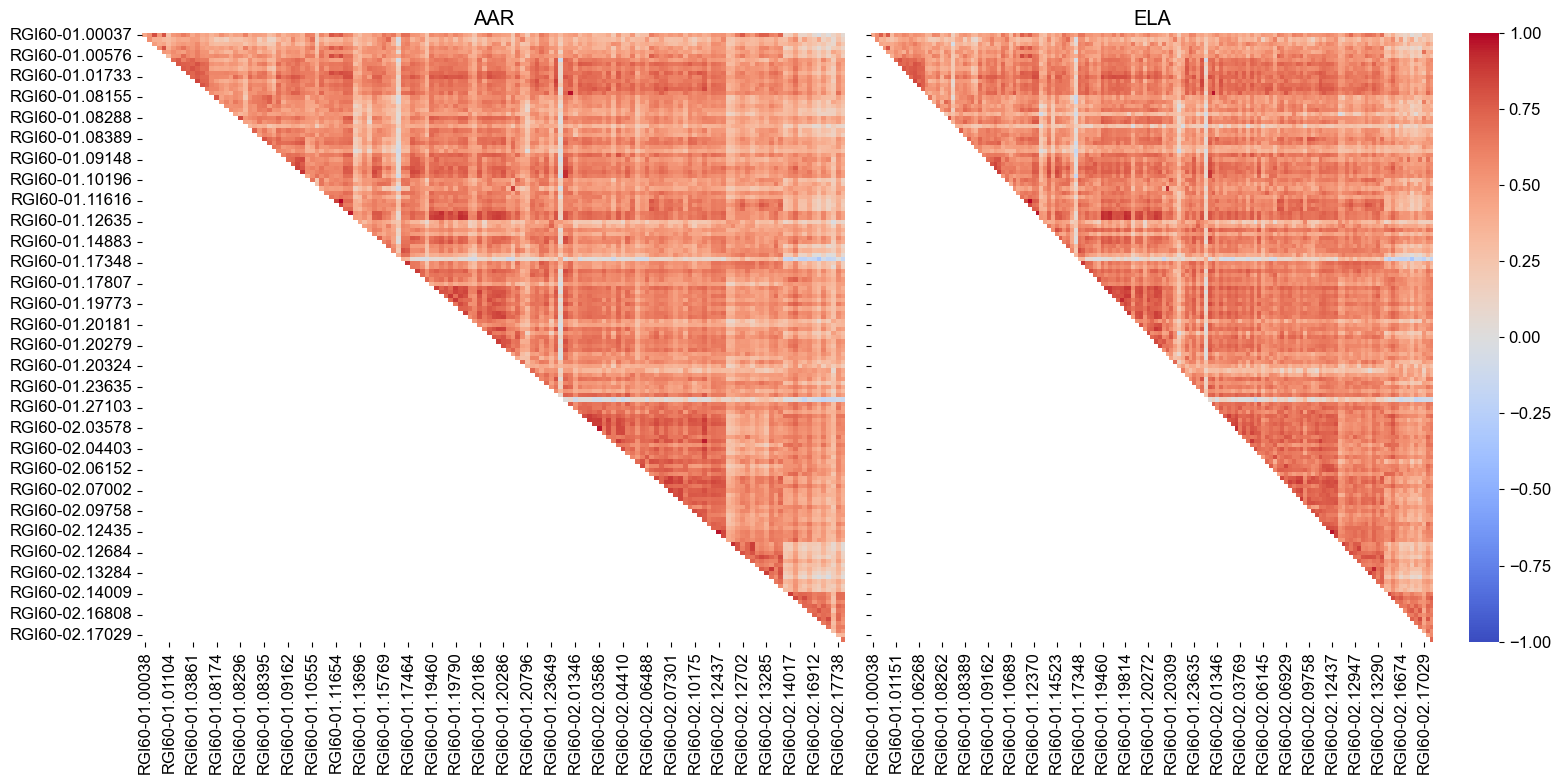

figure saved to file: /Users/raineyaberle/Google Drive/My Drive/Research/CryoGARS-Glaciology/Advising/student-research/Alexandra-Friel/snow_cover_mapping_application/study-sites/../snow-cover-mapping-application/figures/corrcoeffs_heatmap_all_sites.png
AAR Correlation Coefficients:
     Mean = 0.5109143606950568
     Std. = 0.16334396909588866
     Median = 0.5272346423065084
     MAD = 0.10279377260395905
ELA Correlation Coefficients:
     Mean = 0.5354948660310724
     Std. = 0.16111019130450344
     Median = 0.5596966727780277
     MAD = 0.09741740956386066


In [47]:
# -----All sites
plt.rcParams.update({'font.size':12, 'font.sans-serif': 'Arial'})
training_data_df.index = training_data_df['Date']

correlation_all_sites = []
for i in tqdm(range(0, len(unique_site_names))):
    
    site1_df = training_data_df.loc[training_data_df['site_name']==unique_site_names[i]]
    site1_df = site1_df[~site1_df.index.duplicated(keep='first')].sort_index()  # remove duplicate dates, sort by date
    
    for j in range(i+1, len(unique_site_names)):
        
        site2_df = training_data_df.loc[training_data_df['site_name']==unique_site_names[j]]
        site2_df = site2_df[~site2_df.index.duplicated(keep='first')].sort_index()  # remove duplicate dates, sort by date

        # resample both dataframes at a daily time interval
        site1_df = site1_df.resample('1D').bfill()
        site2_df = site2_df.resample('1D').bfill()
        min_date = np.min([site1_df.iloc[0]['Date'], site2_df.iloc[0]['Date']])
        max_date = np.max([site1_df.iloc[-1]['Date'], site2_df.iloc[-1]['Date']])
        site1_df = site1_df.loc[(site1_df['Date'] >= min_date) & (site1_df['Date'] <= max_date)]
        site2_df = site2_df.loc[(site2_df['Date'] >= min_date) & (site2_df['Date'] <= max_date)]
    
        # calculate correlation coefficient
        aar_correlation = pd.DataFrame({'Site1': site1_df['AAR'], 
                                        'Site2': site2_df['AAR']}).corr().iloc[0,1]
        snowline_correlation = pd.DataFrame({'Site1': site1_df['ELA_from_AAR_m'], 
                                             'Site2': site2_df['ELA_from_AAR_m']}).corr().iloc[0,1]
        correlation_all_sites.append({'Site1': unique_site_names[i], 
                                      'Site2': unique_site_names[j], 
                                      'AAR Correlation': aar_correlation, 
                                      'ELA Correlation': snowline_correlation})

correlation_df = pd.DataFrame(correlation_all_sites)

# plot
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
sns.heatmap(correlation_df.pivot_table(index='Site1', columns='Site2', values='AAR Correlation'), 
            ax=ax[0], cmap='coolwarm', vmin=-1, vmax=1, cbar=False)
ax[0].set_title('AAR')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
sns.heatmap(correlation_df.pivot_table(index='Site1', columns='Site2', values='ELA Correlation'), 
            ax=ax[1], cmap='coolwarm', vmin=-1, vmax=1)
ax[1].set_title('ELA')
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].set_yticklabels([])
fig.tight_layout()
plt.show()

# save figure
fig_fn = os.path.join(figures_out_path, 'corrcoeffs_heatmap_all_sites.png')
fig.savefig(fig_fn, dpi=300, bbox_inches='tight')
print('figure saved to file: ' + fig_fn)

# print correlation coefficient statistics
print('AAR Correlation Coefficients:')
print('     Mean = ' + str(np.nanmean(correlation_df.pivot_table(index='Site1', columns='Site2', values='AAR Correlation'))))
print('     Std. = ' + str(np.nanstd(correlation_df.pivot_table(index='Site1', columns='Site2', values='AAR Correlation'))))
print('     Median = ' + str(np.nanmedian(correlation_df.pivot_table(index='Site1', columns='Site2', values='AAR Correlation'))))
print('     MAD = ' + str(median_abs_deviation(np.ravel(correlation_df.pivot_table(index='Site1', columns='Site2', values='AAR Correlation').values), 
                                               nan_policy='omit')) )
print('ELA Correlation Coefficients:')
print('     Mean = ' + str(np.nanmean(correlation_df.pivot_table(index='Site1', columns='Site2', values='ELA Correlation'))))
print('     Std. = ' + str(np.nanstd(correlation_df.pivot_table(index='Site1', columns='Site2', values='ELA Correlation'))))
print('     Median = ' + str(np.nanmedian(correlation_df.pivot_table(index='Site1', columns='Site2', values='ELA Correlation'))))
print('     MAD = ' + str(median_abs_deviation(np.ravel(correlation_df.pivot_table(index='Site1', columns='Site2', values='ELA Correlation').values), 
                                               nan_policy='omit')))


Alaska Range
Number of sites = 18


  0%|          | 0/18 [00:00<?, ?it/s]

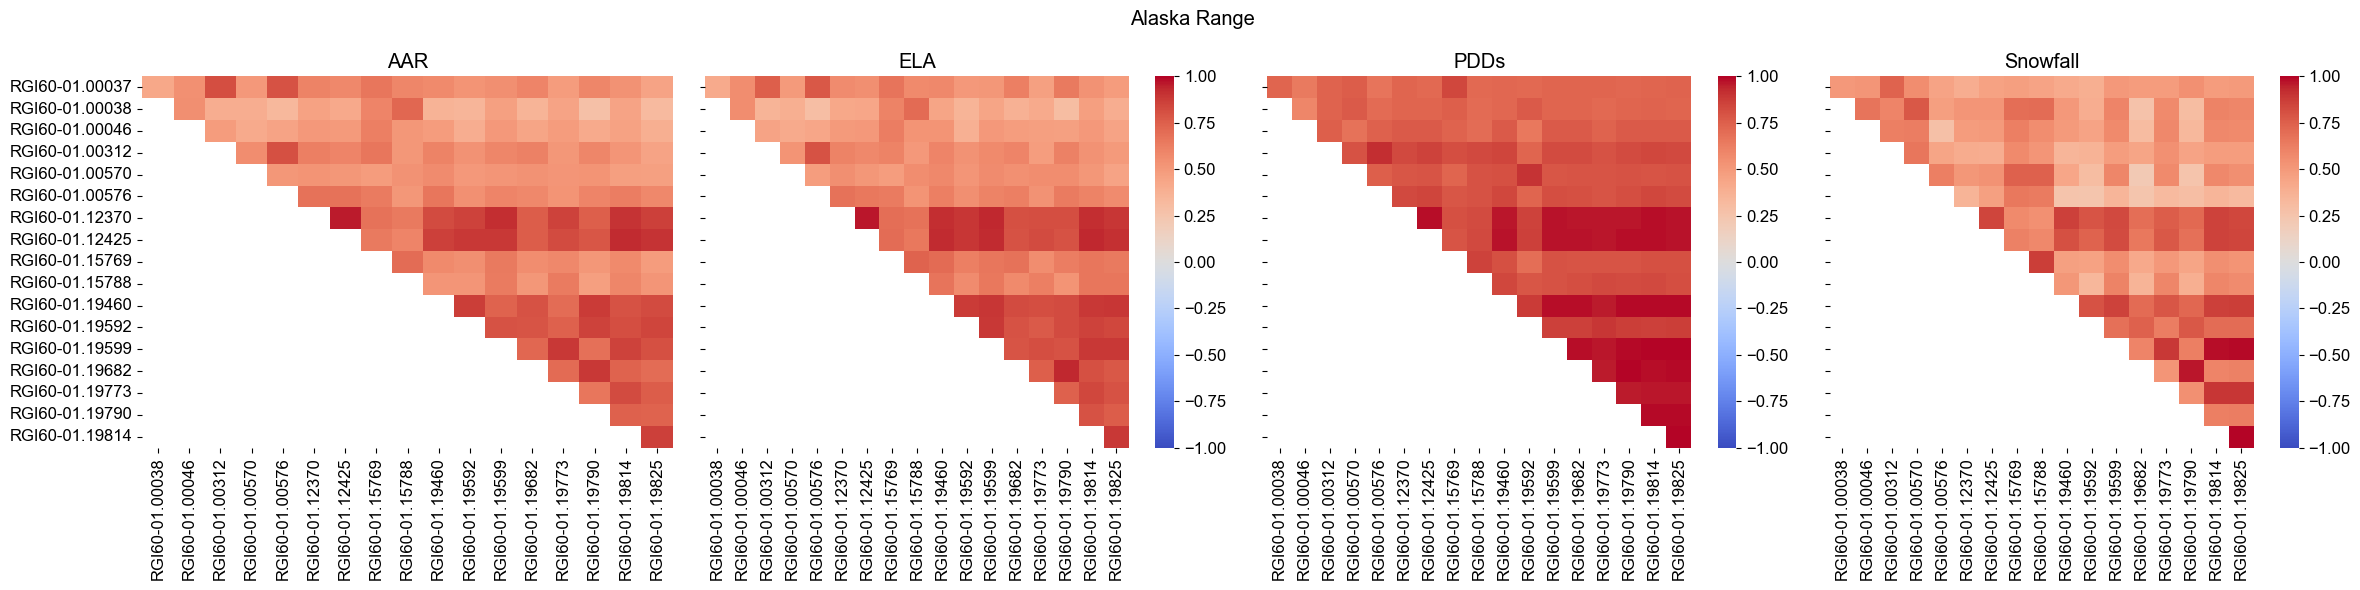

figure saved to file: /Users/raineyaberle/Google Drive/My Drive/Research/CryoGARS-Glaciology/Advising/student-research/Alexandra-Friel/snow_cover_mapping_application/study-sites/../snow-cover-mapping-application/figures/corrcoeffs_heatmap_Alaska Range.png
 
Aleutians
Number of sites = 27


  0%|          | 0/27 [00:00<?, ?it/s]

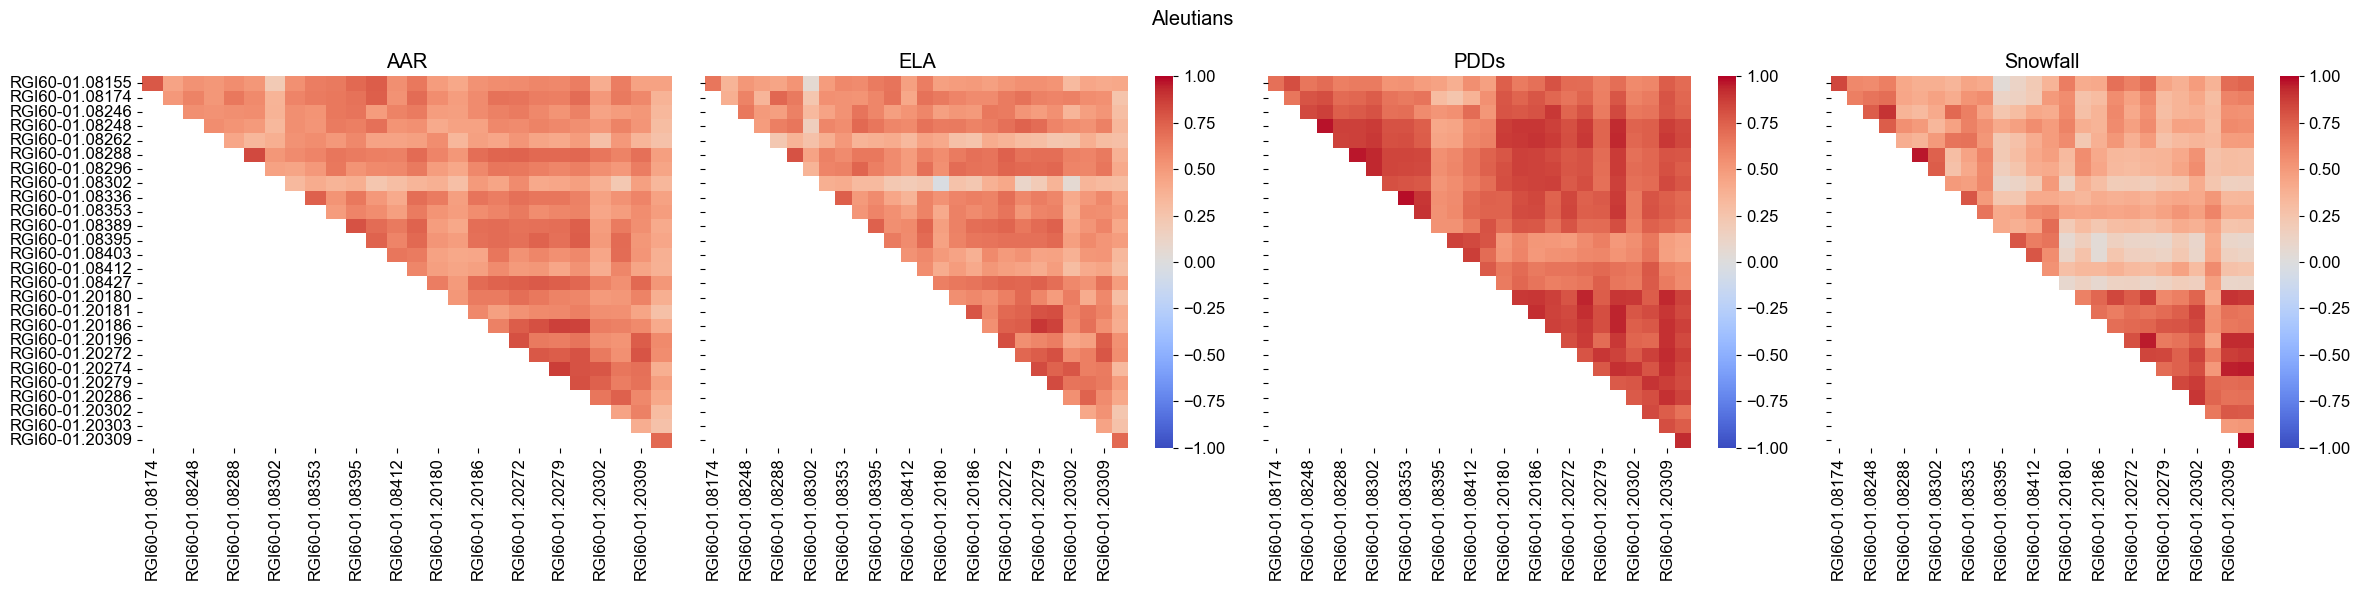

figure saved to file: /Users/raineyaberle/Google Drive/My Drive/Research/CryoGARS-Glaciology/Advising/student-research/Alexandra-Friel/snow_cover_mapping_application/study-sites/../snow-cover-mapping-application/figures/corrcoeffs_heatmap_Aleutians.png
 
W. Chugach Mtns.
Number of sites = 15


  0%|          | 0/15 [00:00<?, ?it/s]

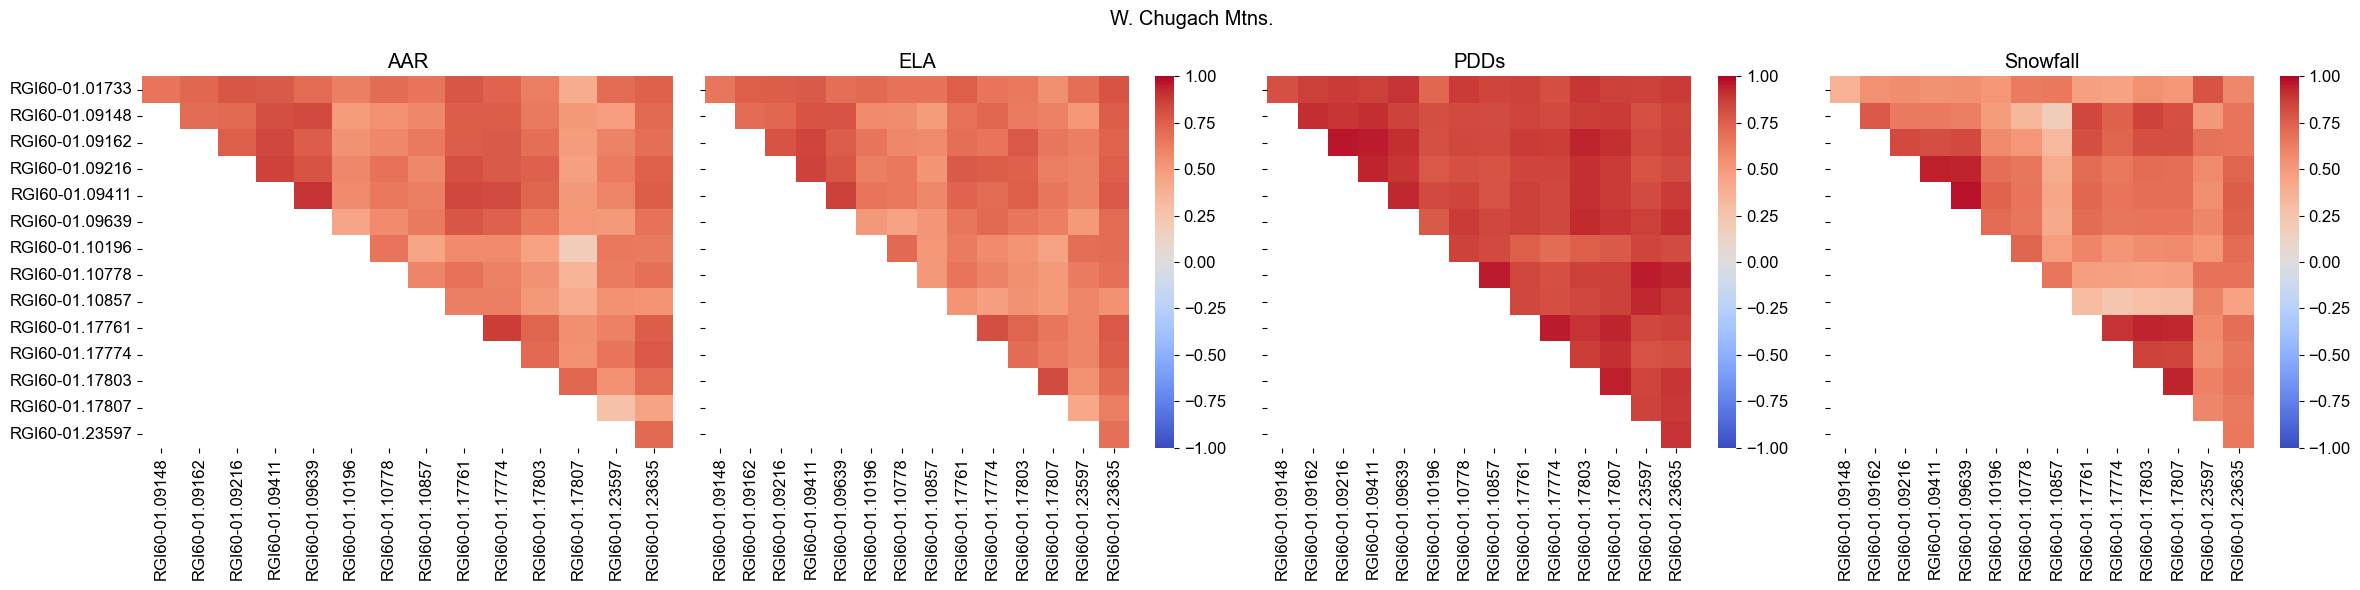

figure saved to file: /Users/raineyaberle/Google Drive/My Drive/Research/CryoGARS-Glaciology/Advising/student-research/Alexandra-Friel/snow_cover_mapping_application/study-sites/../snow-cover-mapping-application/figures/corrcoeffs_heatmap_W. Chugach Mtns..png
 
St. Elias Mtns.
Number of sites = 12


  0%|          | 0/12 [00:00<?, ?it/s]

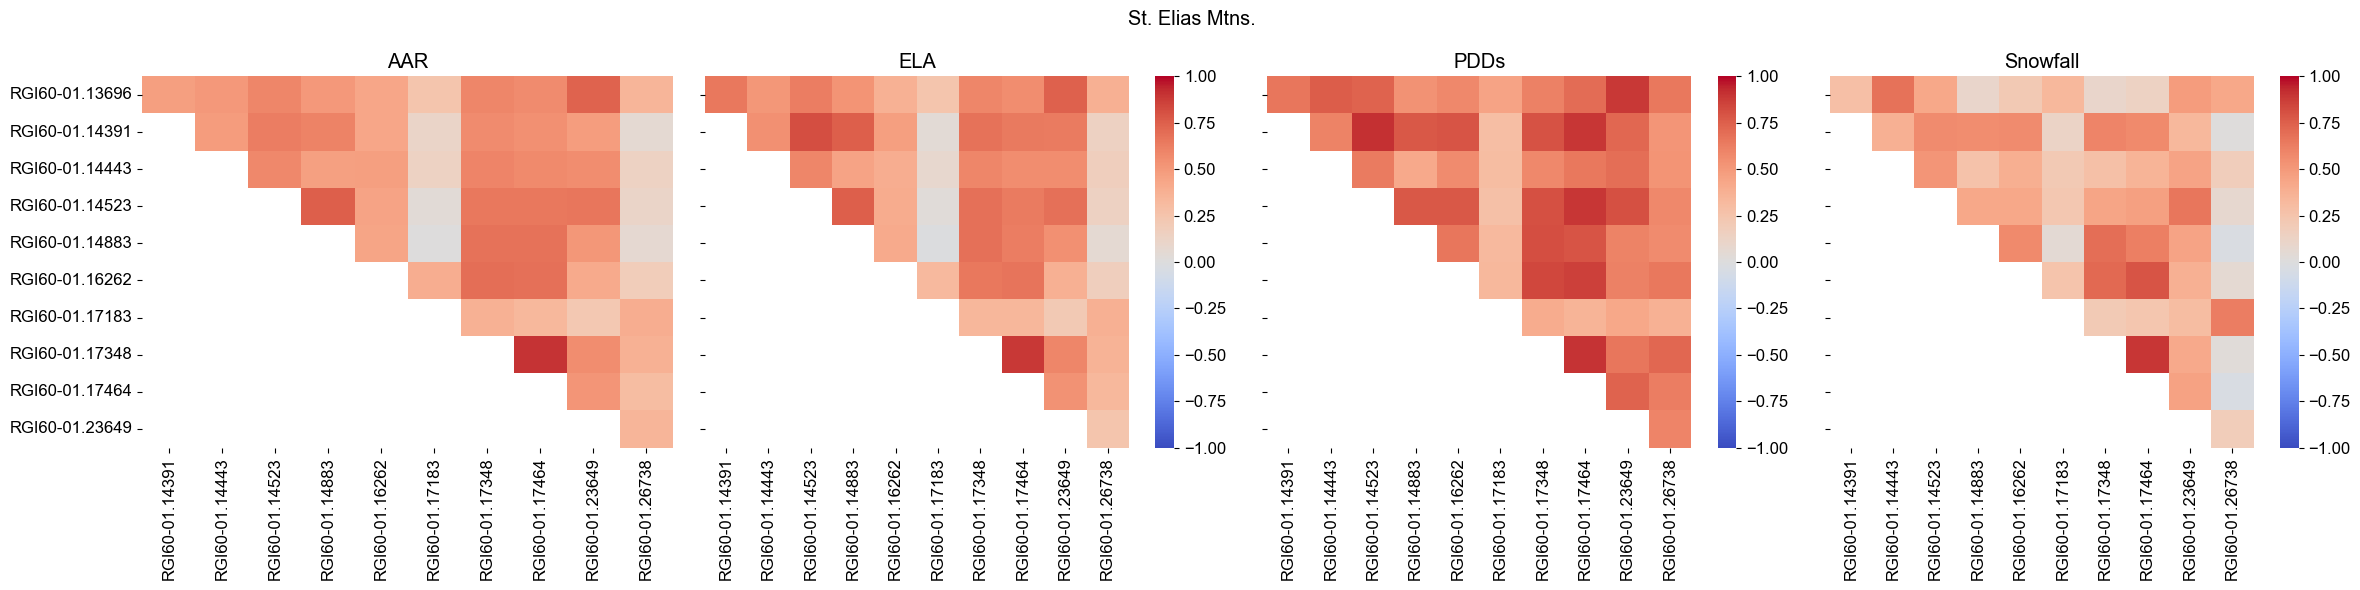

figure saved to file: /Users/raineyaberle/Google Drive/My Drive/Research/CryoGARS-Glaciology/Advising/student-research/Alexandra-Friel/snow_cover_mapping_application/study-sites/../snow-cover-mapping-application/figures/corrcoeffs_heatmap_St. Elias Mtns..png
 
N. Coast Ranges
Number of sites = 13


  0%|          | 0/13 [00:00<?, ?it/s]

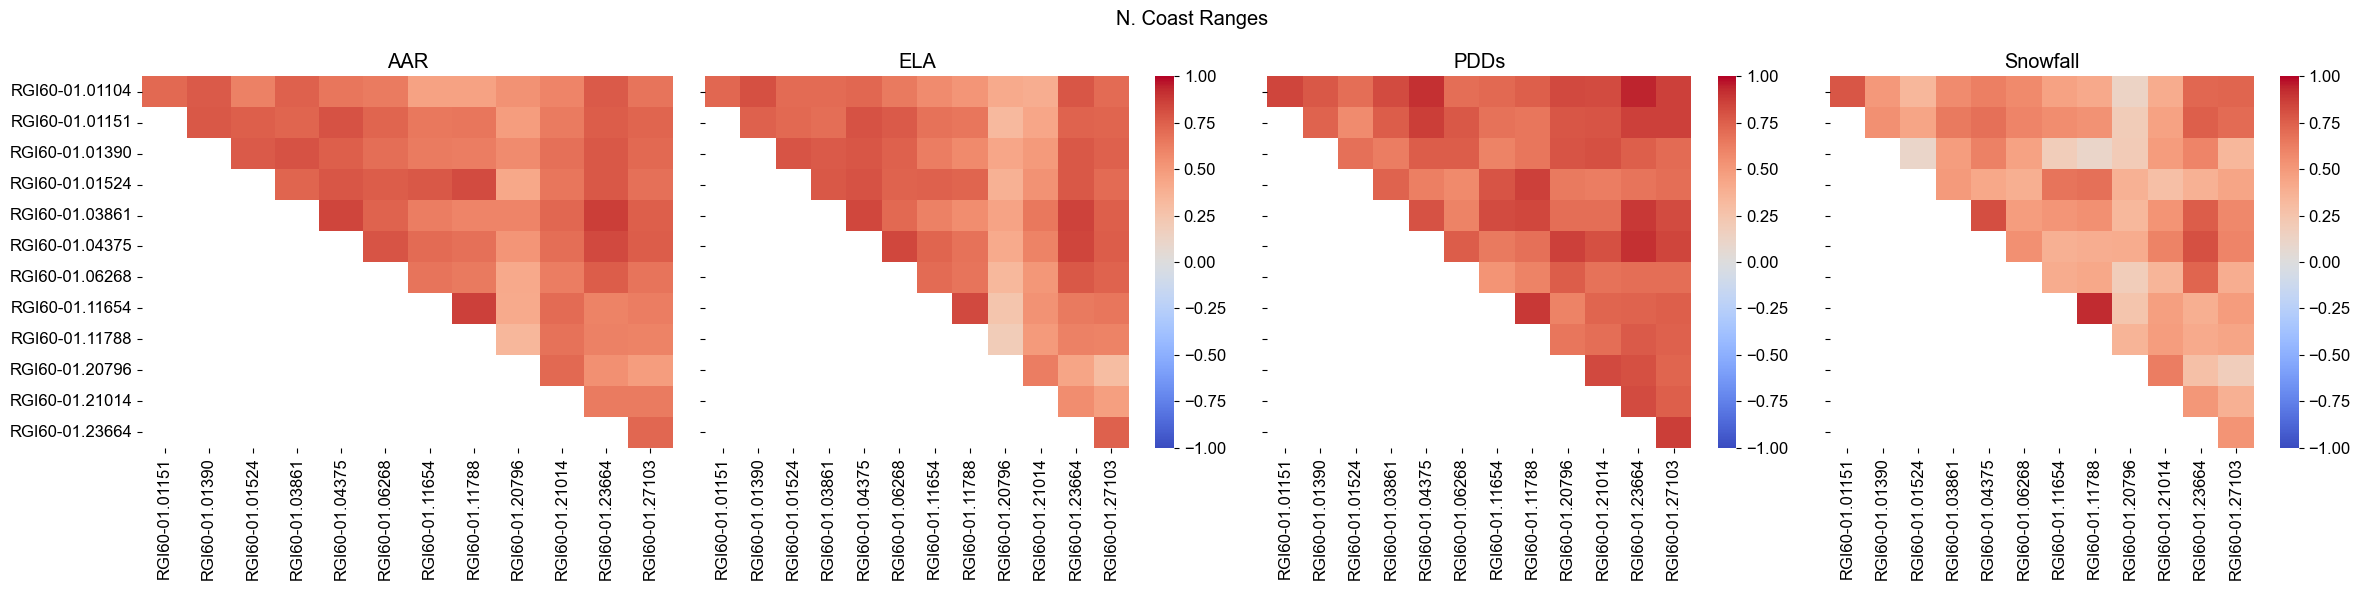

figure saved to file: /Users/raineyaberle/Google Drive/My Drive/Research/CryoGARS-Glaciology/Advising/student-research/Alexandra-Friel/snow_cover_mapping_application/study-sites/../snow-cover-mapping-application/figures/corrcoeffs_heatmap_N. Coast Ranges.png
 
N. Rockies
Number of sites = 12


  0%|          | 0/12 [00:00<?, ?it/s]

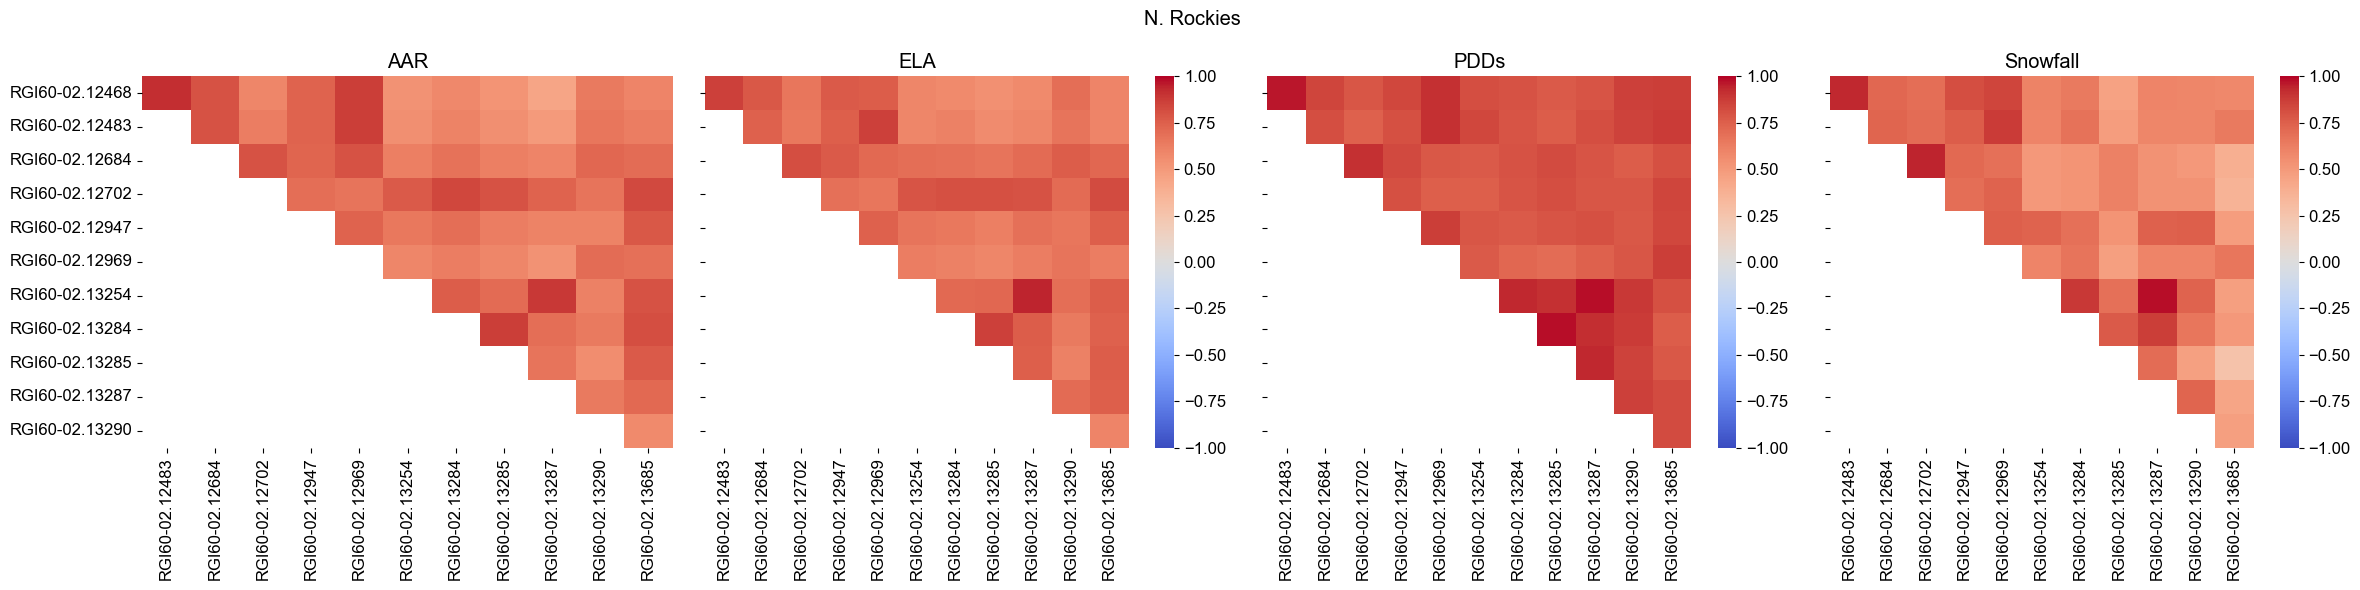

figure saved to file: /Users/raineyaberle/Google Drive/My Drive/Research/CryoGARS-Glaciology/Advising/student-research/Alexandra-Friel/snow_cover_mapping_application/study-sites/../snow-cover-mapping-application/figures/corrcoeffs_heatmap_N. Rockies.png
 
N. Cascades
Number of sites = 17


  0%|          | 0/17 [00:00<?, ?it/s]

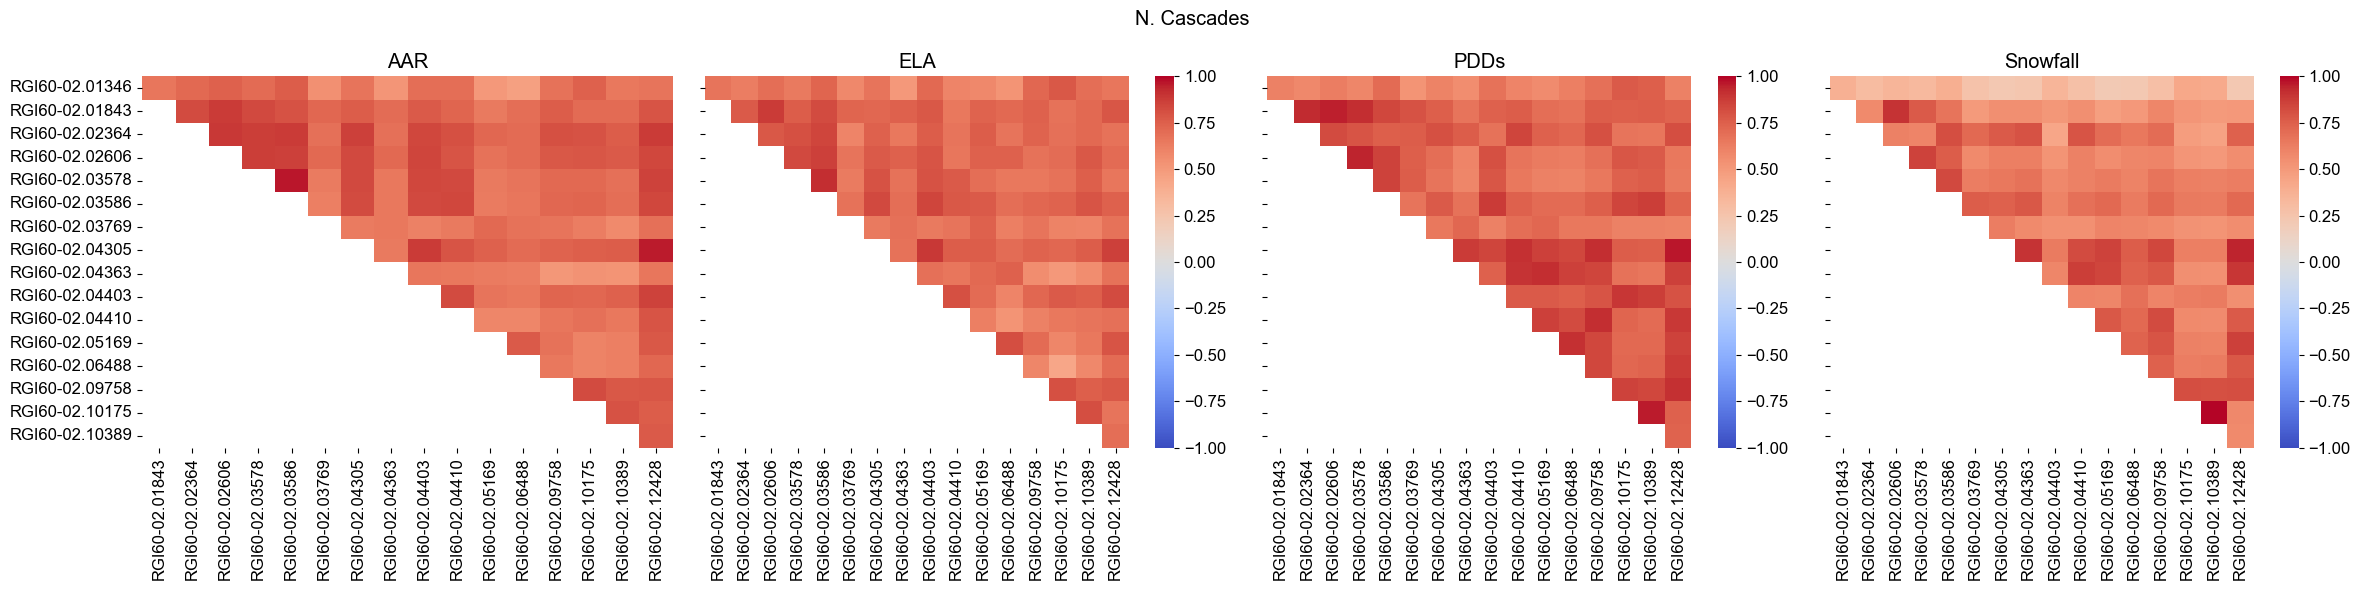

figure saved to file: /Users/raineyaberle/Google Drive/My Drive/Research/CryoGARS-Glaciology/Advising/student-research/Alexandra-Friel/snow_cover_mapping_application/study-sites/../snow-cover-mapping-application/figures/corrcoeffs_heatmap_N. Cascades.png
 
C. Rockies
Number of sites = 13


  0%|          | 0/13 [00:00<?, ?it/s]

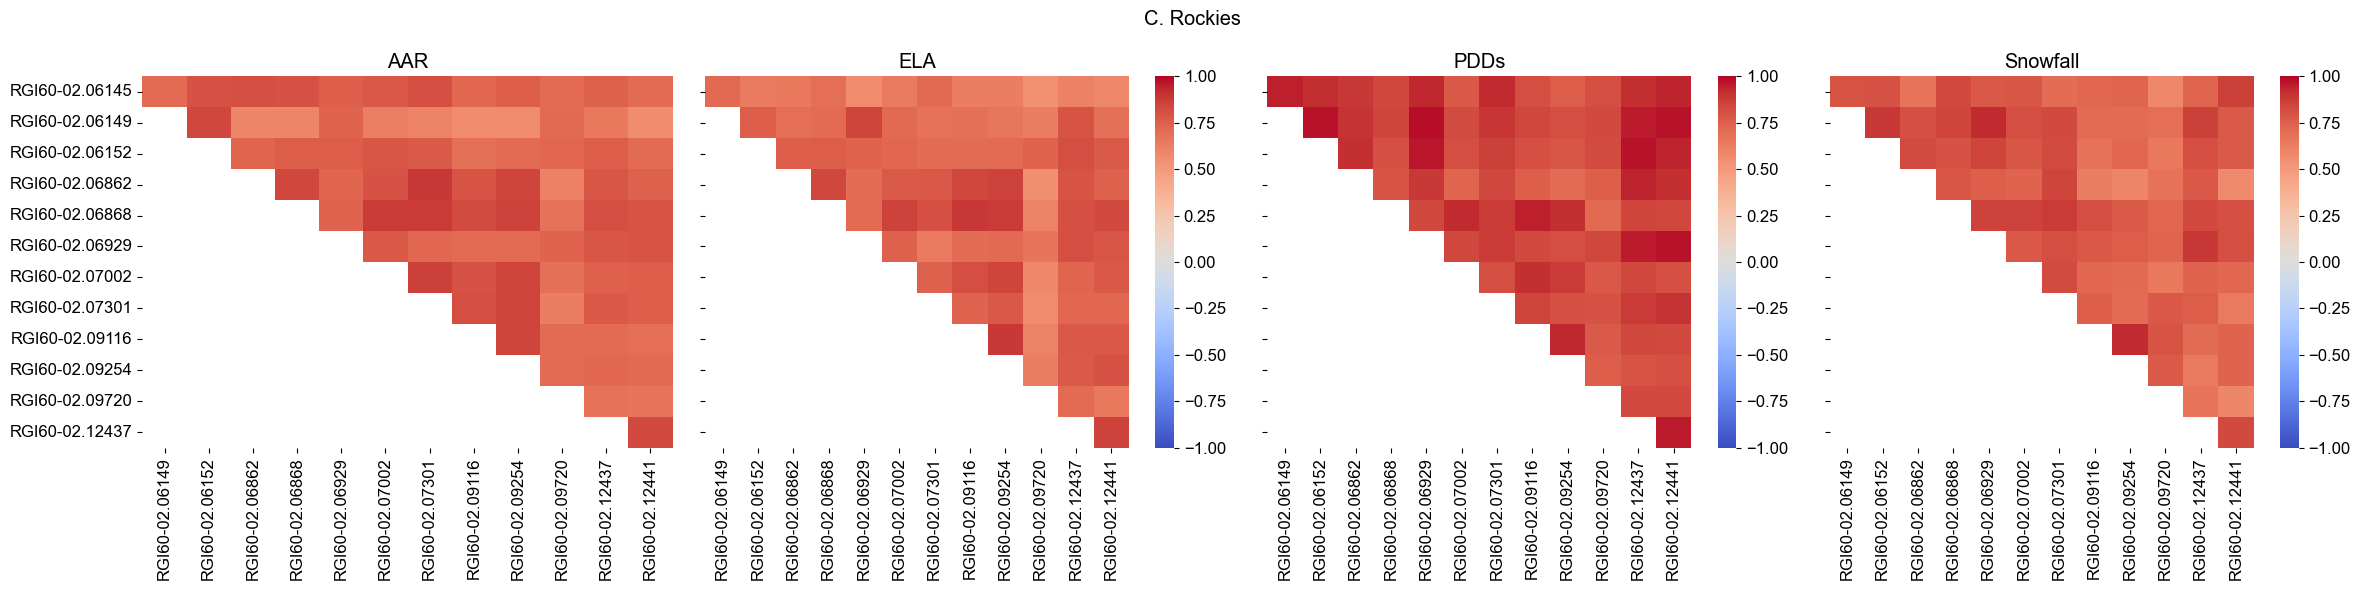

figure saved to file: /Users/raineyaberle/Google Drive/My Drive/Research/CryoGARS-Glaciology/Advising/student-research/Alexandra-Friel/snow_cover_mapping_application/study-sites/../snow-cover-mapping-application/figures/corrcoeffs_heatmap_C. Rockies.png
 
S. Cascades
Number of sites = 9


  0%|          | 0/9 [00:00<?, ?it/s]

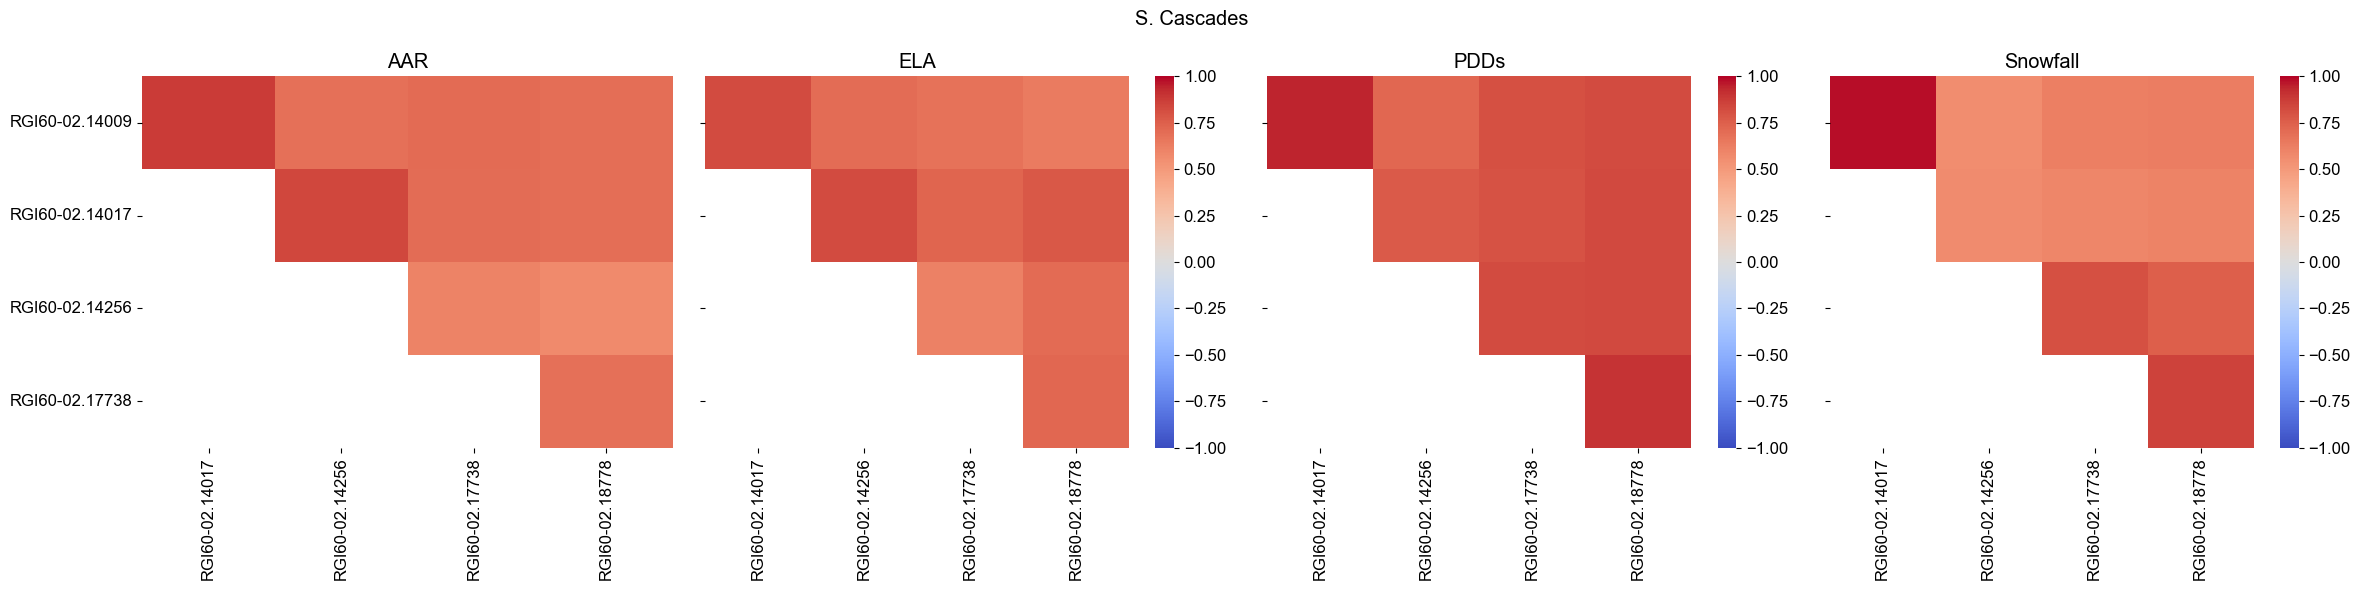

figure saved to file: /Users/raineyaberle/Google Drive/My Drive/Research/CryoGARS-Glaciology/Advising/student-research/Alexandra-Friel/snow_cover_mapping_application/study-sites/../snow-cover-mapping-application/figures/corrcoeffs_heatmap_S. Cascades.png
 
S. Rockies
Number of sites = 8


  0%|          | 0/8 [00:00<?, ?it/s]

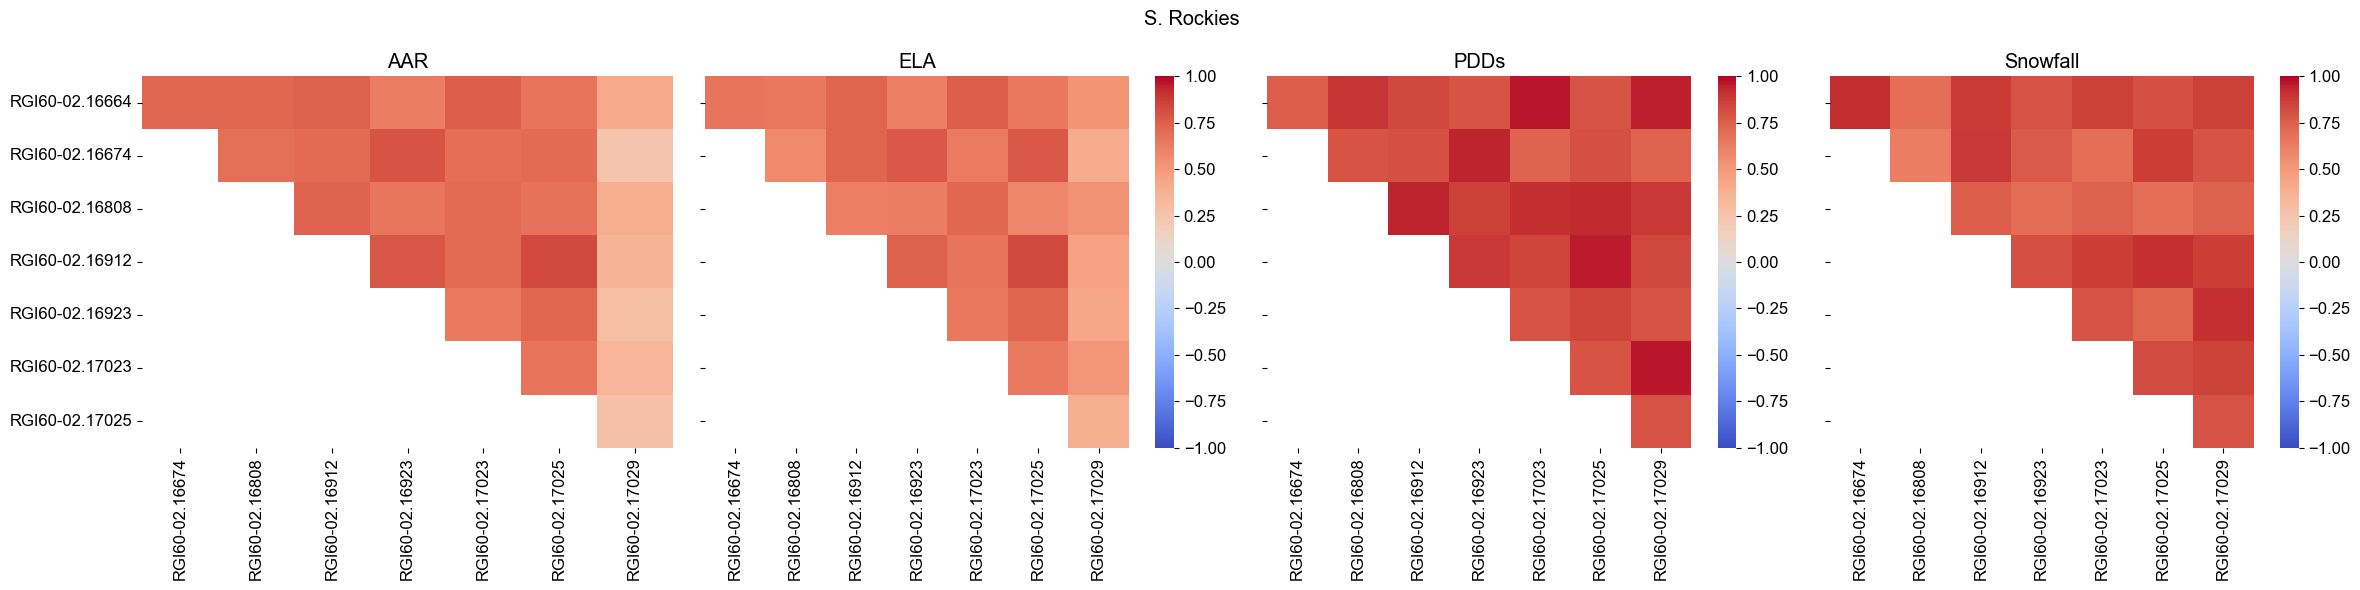

figure saved to file: /Users/raineyaberle/Google Drive/My Drive/Research/CryoGARS-Glaciology/Advising/student-research/Alexandra-Friel/snow_cover_mapping_application/study-sites/../snow-cover-mapping-application/figures/corrcoeffs_heatmap_S. Rockies.png
 


In [48]:
# -----For individual subregions
correlation_full_df = pd.DataFrame()
plt.rcParams.update({'font.size':12, 'font.sans-serif': 'Arial'})
training_data_df.index = training_data_df['Date']

for o1region, o2region in unique_subregions:

    # grab aois in subregion
    aois_subregion = aois.loc[(aois['O1Region']==o1region) & (aois['O2Region']==o2region)].reset_index(drop=True)
    # grab RGI IDs in subregion
    ids_subregion = aois_subregion['RGIId']
    # grab snowlines with matching names
    snowlines_subregion = training_data_df[training_data_df['site_name'].isin(ids_subregion)]
    # determine subregion name and color for plotting
    subregion_name, color = f.determine_subregion_name_color(o1region, o2region)
    print(subregion_name)

    # grab list of unique sites in subregion
    unique_site_names_subregion = sorted(snowlines_subregion['site_name'].drop_duplicates().values)
    print('Number of sites = ' + str(len(unique_site_names_subregion)))
    
    correlation_subregion = []
    for i in tqdm(range(0, len(unique_site_names_subregion))):
        
        site1_df = snowlines_subregion.loc[snowlines_subregion['site_name']==unique_site_names_subregion[i]]
        site1_df = site1_df[~site1_df.index.duplicated(keep='first')].sort_index()  # remove duplicate dates, sort by date
        
        for j in range(i+1, len(unique_site_names_subregion)):
            
            site2_df = snowlines_subregion.loc[snowlines_subregion['site_name']==unique_site_names_subregion[j]]
            site2_df = site2_df[~site2_df.index.duplicated(keep='first')].sort_index()  # remove duplicate dates, sort by date
    
            # resample both dataframes at a daily time interval
            site1_df = site1_df.resample('1D').bfill()
            site2_df = site2_df.resample('1D').bfill()
            min_date = np.min([site1_df.iloc[0]['Date'], site2_df.iloc[0]['Date']])
            max_date = np.max([site1_df.iloc[-1]['Date'], site2_df.iloc[-1]['Date']])
            site1_df = site1_df.loc[(site1_df['Date'] >= min_date) & (site1_df['Date'] <= max_date)]
            site2_df = site2_df.loc[(site2_df['Date'] >= min_date) & (site2_df['Date'] <= max_date)]
    
            # calculate correlation coefficient
            aar_correlation = pd.DataFrame({'Site1': site1_df['AAR'], 
                                            'Site2': site2_df['AAR']}).corr().iloc[0,1]
            ela_correlation = pd.DataFrame({'Site1': site1_df['ELA_from_AAR_m'], 
                                            'Site2': site2_df['ELA_from_AAR_m']}).corr().iloc[0,1]
            pdd_correlation = pd.DataFrame({'Site1': site1_df['Cumulative_Positive_Degree_Days'], 
                                            'Site2': site2_df['Cumulative_Positive_Degree_Days']}).corr().iloc[0,1]
            snowfall_correlation = pd.DataFrame({'Site1': site1_df['Cumulative_Snowfall_mwe'], 
                                                 'Site2': site2_df['Cumulative_Snowfall_mwe']}).corr().iloc[0,1]
            correlation_subregion.append({'Site1': unique_site_names_subregion[i], 
                                          'Site2': unique_site_names_subregion[j], 
                                          'AAR Correlation': aar_correlation, 
                                          'ELA Correlation': ela_correlation,
                                          'PDD Correlation': pdd_correlation,
                                          'Snowfall Correlation': snowfall_correlation
                                         })

    # convert list to pandas.DataFrame
    correlation_df = pd.DataFrame(correlation_subregion)
    mean_aar_correlations = correlation_df['AAR Correlation'].dropna().values
    mean_ela_correlations = correlation_df['ELA Correlation'].dropna().values
    mean_pdd_correlations = correlation_df['PDD Correlation'].dropna().values
    mean_snowfall_correlations = correlation_df['Snowfall Correlation'].dropna().values
    # concatenate mean regional statistics with full correlation df
    correlation_mean_df = pd.DataFrame({'Subregion': [subregion_name],
                                        'Mean AAR Correlation': [mean_aar_correlations],
                                        'Mean ELA Correlation': [mean_ela_correlations],
                                        'Mean PDD Correlation': [mean_pdd_correlations],
                                        'Mean Snowfall Correlation': [mean_snowfall_correlations],
                                        'Color': [color]
                                       })
    correlation_full_df = pd.concat([correlation_full_df, correlation_mean_df])
    
    # plot
    if save_figures:
        fig, ax = plt.subplots(1, 4, figsize=(24, 6))
        sns.heatmap(correlation_df.pivot_table(index='Site1', columns='Site2', values='AAR Correlation'), 
                    ax=ax[0], cmap='coolwarm', vmin=-1, vmax=1, cbar=False)
        ax[0].set_title('AAR')
        ax[0].set_xlabel('')
        ax[0].set_ylabel('')
        sns.heatmap(correlation_df.pivot_table(index='Site1', columns='Site2', values='ELA Correlation'), 
                    ax=ax[1], cmap='coolwarm', vmin=-1, vmax=1)
        ax[1].set_title('ELA')
        ax[1].set_xlabel('')
        ax[1].set_ylabel('')
        ax[1].set_yticklabels([])
        sns.heatmap(correlation_df.pivot_table(index='Site1', columns='Site2', values='PDD Correlation'), 
                    ax=ax[2], cmap='coolwarm', vmin=-1, vmax=1)
        ax[2].set_title('PDDs')
        ax[2].set_xlabel('')
        ax[2].set_ylabel('')
        ax[2].set_yticklabels([])
        sns.heatmap(correlation_df.pivot_table(index='Site1', columns='Site2', values='Snowfall Correlation'), 
                    ax=ax[3], cmap='coolwarm', vmin=-1, vmax=1)
        ax[3].set_title('Snowfall')
        ax[3].set_xlabel('')
        ax[3].set_ylabel('')
        ax[3].set_yticklabels([])
        fig.suptitle(subregion_name)
        fig.tight_layout()
        plt.show()

        # save figure
        fig_fn = os.path.join(figures_out_path, 'corrcoeffs_heatmap_' + subregion_name + '.png')
        fig.savefig(fig_fn, dpi=300, bbox_inches='tight')
        print('figure saved to file: ' + fig_fn)

    # print correlation coefficient statistics
    # print('AAR Correlation Coefficients:')
    # print('     Mean = ' + str(np.nanmean(correlation_df.pivot_table(index='Site1', columns='Site2', values='AAR Correlation'))))
    # print('     Std. = ' + str(np.nanstd(correlation_df.pivot_table(index='Site1', columns='Site2', values='AAR Correlation'))))
    # print('     Median = ' + str(np.nanmedian(correlation_df.pivot_table(index='Site1', columns='Site2', values='AAR Correlation'))))
    # print('     MAD = ' + str(median_abs_deviation(np.ravel(correlation_df.pivot_table(index='Site1', columns='Site2', values='AAR Correlation').values), 
    #                                                nan_policy='omit')))
    # print('Median Snowline Elevations Correlation Coefficients:')
    # print('     Mean = ' + str(np.nanmean(correlation_df.pivot_table(index='Site1', columns='Site2', values='ELA Correlation'))))
    # print('     Std. = ' + str(np.nanstd(correlation_df.pivot_table(index='Site1', columns='Site2', values='ELA Correlation'))))
    # print('     Median = ' + str(np.nanmedian(correlation_df.pivot_table(index='Site1', columns='Site2', values='ELA Correlation'))))
    # print('     MAD = ' + str(median_abs_deviation(np.ravel(correlation_df.pivot_table(index='Site1', columns='Site2', values='ELA Correlation').values), 
    #                                                nan_policy='omit')))
    print(' ')



AAR
[('Alaska Range', 0.590526649813998), ('Aleutians', 0.5628979861520225), ('W. Chugach Mtns.', 0.6551306898024393), ('St. Elias Mtns.', 0.4791710726793585), ('N. Coast Ranges', 0.6850591143744136), ('N. Rockies', 0.6726037354100722), ('N. Cascades', 0.715340475630325), ('C. Rockies', 0.7463295696245216), ('S. Cascades', 0.691659800330431), ('S. Rockies', 0.689261185425979)]
 
PDDs
[('Alaska Range', 0.8085624834079908), ('Aleutians', 0.7610186350621315), ('W. Chugach Mtns.', 0.8579276095117798), ('St. Elias Mtns.', 0.6515707765541016), ('N. Coast Ranges', 0.7549779524016197), ('N. Rockies', 0.8129877503995204), ('N. Cascades', 0.7514419524497271), ('C. Rockies', 0.841233289131881), ('S. Cascades', 0.8255609202508929), ('S. Rockies', 0.8437773058399569)]
 
Snowfall
[('Alaska Range', 0.572666029245717), ('Aleutians', 0.4285707031695848), ('W. Chugach Mtns.', 0.6568800775198932), ('St. Elias Mtns.', 0.3810451337737215), ('N. Coast Ranges', 0.4779077528564669), ('N. Rockies', 0.631487453

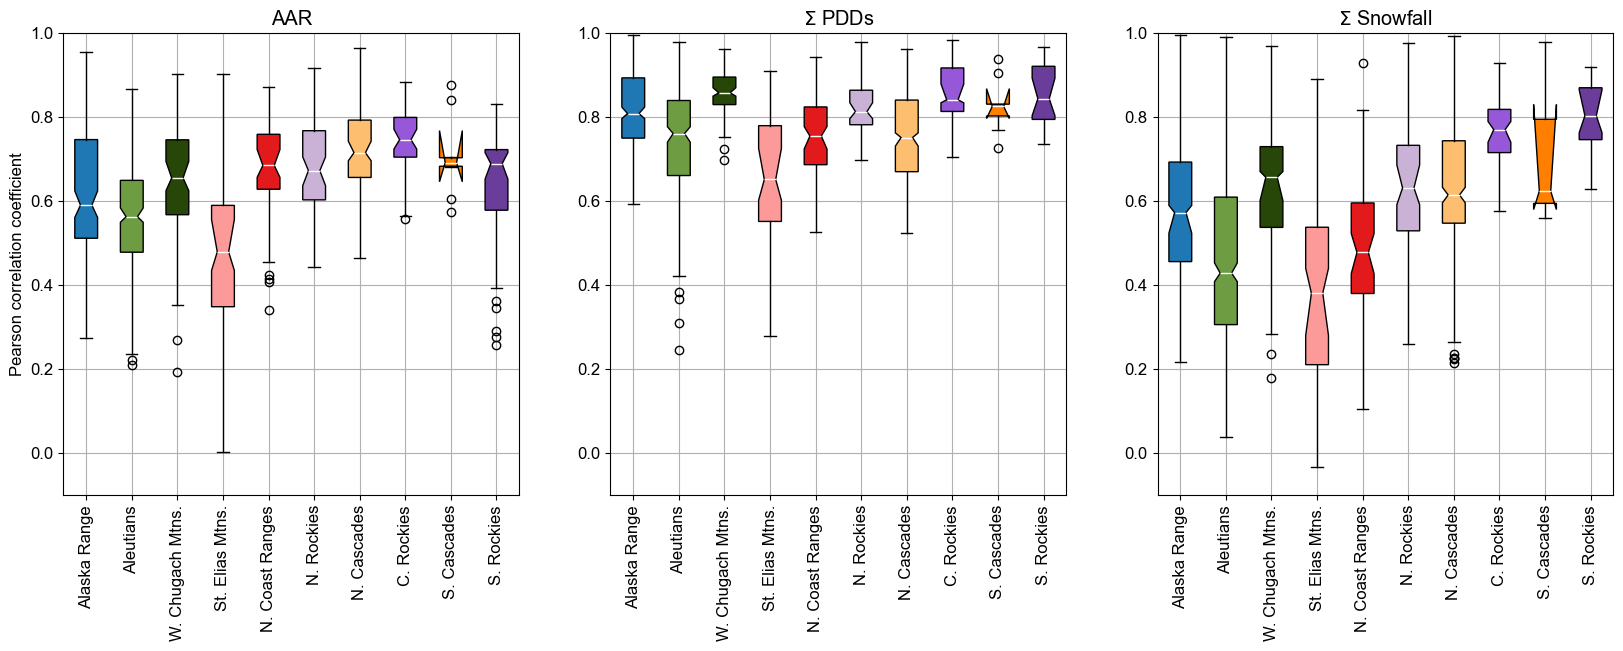

figure saved to file: /Users/raineyaberle/Google Drive/My Drive/Research/CryoGARS-Glaciology/Advising/student-research/Alexandra-Friel/snow_cover_mapping_application/study-sites/../snow-cover-mapping-application/figures/corrcoeffs_boxplots.png


In [49]:
# Plot boxplots for all regions
correlation_full_df.reset_index(drop=True, inplace=True)
fig, ax = plt.subplots(1, 3, figsize=(20,6))
# AAR
bplot = ax[0].boxplot(correlation_full_df['Mean AAR Correlation'], notch=True, bootstrap=1000,
                    patch_artist=True, labels=correlation_full_df['Subregion'])
for patch, color in zip(bplot['boxes'], correlation_full_df['Color'].values):
    patch.set_facecolor(color)
for median in bplot['medians']:
    median.set_color('white')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[0].grid()
ax[0].set_ylabel('Pearson correlation coefficient')
ax[0].set_title('AAR')
ax[0].set_ylim(-0.1, 1)
print('AAR')
medians = [median.get_ydata()[0] for median in bplot['medians']]
print(list(zip(correlation_full_df['Subregion'].values, medians)))
print(' ')

# PDDs
bplot = ax[1].boxplot(correlation_full_df['Mean PDD Correlation'], notch=True, bootstrap=1000,
                    patch_artist=True, labels=correlation_full_df['Subregion'])
for patch, color in zip(bplot['boxes'], correlation_full_df['Color'].values):
    patch.set_facecolor(color)
for median in bplot['medians']:
    median.set_color('white')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
ax[1].grid()
ax[1].set_title('$\Sigma$ PDDs')
ax[1].set_ylim(-0.1, 1)
print('PDDs')
medians = [median.get_ydata()[0] for median in bplot['medians']]
print(list(zip(correlation_full_df['Subregion'].values, medians)))
print(' ')

# Snowfall
bplot = ax[2].boxplot(correlation_full_df['Mean Snowfall Correlation'], notch=True, bootstrap=1000,
                    patch_artist=True, labels=correlation_full_df['Subregion'])
for patch, color in zip(bplot['boxes'], correlation_full_df['Color'].values):
    patch.set_facecolor(color)
for median in bplot['medians']:
    median.set_color('white')
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=90)
ax[2].grid()
ax[2].set_title('$\Sigma$ Snowfall')
ax[2].set_ylim(-0.1, 1)
print('Snowfall')
medians = [median.get_ydata()[0] for median in bplot['medians']]
print(list(zip(correlation_full_df['Subregion'].values, medians)))
print(' ')

plt.show()

# save figure to file
if save_figures:
    fig_fn = os.path.join(figures_out_path, 'corrcoeffs_boxplots.png')
    fig.savefig(fig_fn, dpi=300, bbox_inches='tight')
    print('figure saved to file: ' + fig_fn)

## Calculate correlation coefficients for PDDs and snowfall in each subregion

  0%|          | 0/157 [00:00<?, ?it/s]

/Users/raineyaberle/opt/anaconda3/envs/snow-cover-mapping/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/raineyaberle/opt/anaconda3/envs/snow-cover-mapping/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/raineyaberle/opt/anaconda3/envs/snow-cover-mapping/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/raineyaberle/opt/anaconda3/envs/snow-cover-mapping/lib/python3.11/site-packages/seaborn/_oldc

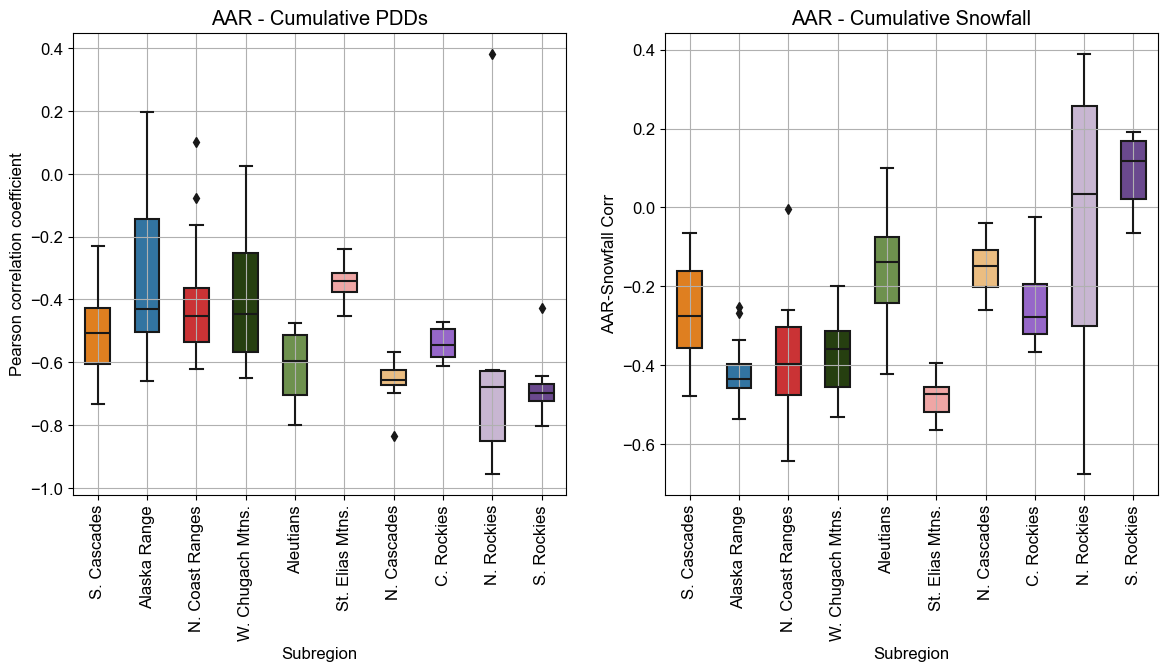

figure saved to file: /Users/raineyaberle/Google Drive/My Drive/Research/CryoGARS-Glaciology/Advising/student-research/Alexandra-Friel/snow_cover_mapping_application/study-sites/../snow-cover-mapping-application/figures/aar_climate_corr_coeffs.png


In [50]:
# define function to load snowline and ERA data for site
def load_site_data(study_sites_path, site_name):
    # Load snowlines
    snowlines_df = pd.DataFrame()
    snowlines_path = os.path.join(study_sites_path, site_name, 'imagery', 'snowlines')
    snowline_fns = glob.glob(snowlines_path + '/*.csv')
    for snowline_fn in snowline_fns:
        try:
            snowline = pd.read_csv(snowline_fn)
            snowlines_df = pd.concat([snowlines_df, snowline])
        except:
            continue
    snowlines_df['datetime'] = pd.to_datetime(snowlines_df['datetime'], format='mixed')
    snowlines_df['Date'] = snowlines_df['datetime'].values.astype('datetime64[D]')
    # don't include observations from PlanetScope
    snowlines_df = snowlines_df.loc[snowlines_df['dataset'] != 'PlanetScope']

    # load AOI
    if 'RGI' in site_name:
        aoi_fn = site_name + '_outline.shp'
    else:
        aoi_fn = site_name + '_RGI_outline.shp'
    aoi_path = os.path.join(study_sites_path, site_name, 'AOIs')
    aoi = gpd.read_file(os.path.join(aoi_path, aoi_fn))
    subregion_name, color= f.determine_subregion_name_color(float(aoi['O1Region'].values[0]), float(aoi['O2Region'].values[0]))
    
    # Load ERA data
    era_fns = glob.glob(study_sites_path + site_name + '/ERA/*.csv')
    era_fn = max(era_fns, key=os.path.getctime)
    era = pd.read_csv(era_fn)
    era.reset_index(drop=True, inplace=True)
    era['Date'] = pd.to_datetime(era['Date'])
    era['Date'] = era['Date'].values.astype('datetime64[D]')

    # Merge ERA and snowlines
    df = pd.merge(snowlines_df, era, on='Date')
    columns = ['site_name', 'Date', 'snowline_elevs_median_m', 'SCA_m2', 'AAR', 'ELA_from_AAR_m', 
               'Cumulative_Positive_Degree_Days', 'Cumulative_Snowfall_mwe']
    df = df[columns]
    df = df.dropna()
    
    return df, subregion_name, color
    
# Load all site names in study_sites_path with snowline and ERA data
site_names = sorted(os.listdir(study_sites_path))
site_names = [site_name for site_name in site_names if os.path.exists(os.path.join(study_sites_path, site_name, 'imagery', 'snowlines'))
              and os.path.exists(os.path.join(study_sites_path, site_name, 'ERA'))]

# Initialize data frame for holding correlations
correlation_climate_df = pd.DataFrame()

# Iterate over site names
for site_name in tqdm(site_names):
    # load data from file
    data_df, subregion_name, color = load_site_data(study_sites_path, site_name)
    # calculate correlation coefficients 
    aar_pdd_correlation = data_df[['AAR', 'Cumulative_Positive_Degree_Days']].corr().iloc[0,1]
    aar_snowfall_correlation = data_df[['AAR', 'Cumulative_Snowfall_mwe']].corr().iloc[0,1]
    correlation_df = pd.DataFrame({'site_name': [site_name], 
                                   'Subregion': [subregion_name],
                                   'Color': [color],
                                   'AAR-PDD Corr': aar_pdd_correlation, 
                                   'AAR-Snowfall Corr': aar_snowfall_correlation})
    correlation_climate_df = pd.concat([correlation_climate_df, correlation_df])

# Adjust dataframe
correlation_climate_df.dropna(inplace=True)
correlation_climate_df.reset_index(drop=True, inplace=True)
# add fake categorical category
subregions = correlation_climate_df['Subregion'].drop_duplicates().reset_index(drop=True)
colors = correlation_climate_df['Color'].drop_duplicates().reset_index(drop=True).values
correlation_climate_df.loc[:,'Category'] = [np.argwhere(x==subregions)[0][0] for x in correlation_climate_df['Subregion'].values]

# Plot results
plt.rcParams.update({'font.size':12, 'font.sans-serif': 'Arial'})
fig, ax = plt.subplots(1,2,figsize=(14,6))
boxwidth = 0.5
order = ['Aleutians', 'Alaska Range', 'W. Chugach Mtns.', 'St. Elias Mtns.', 'N. Coast Ranges',
         'N. Rockies', 'N. Cascades', 'C. Rockies', 'S. Cascades', 'S. Rockies']
# AAR-PDDs
sns.boxplot(data=correlation_climate_df, x='Subregion', y='AAR-PDD Corr', 
            width=boxwidth, order=order, palette=colors, ax=ax[0])
ax[0].set_xticklabels(subregions, rotation=90)
ax[0].grid(True)
ax[0].set_ylabel('Pearson correlation coefficient')
ax[0].set_title('AAR - Cumulative PDDs')
# AAR-Snowfall
sns.boxplot(data=correlation_climate_df, x='Subregion', y='AAR-Snowfall Corr', 
            width=boxwidth, order=order, palette=colors, ax=ax[1])
ax[1].grid(True)
ax[1].set_xticklabels(subregions, rotation=90)
ax[1].set_title('AAR - Cumulative Snowfall')
plt.show()

# Save figure
fig_fn = os.path.join(figures_out_path, 'aar_climate_corr_coeffs.png')
fig.savefig(fig_fn, dpi=300, bbox_inches='tight')
print('figure saved to file: ' + fig_fn)

## Plot some example timeseries to demonstrate correlation analysis

In [ ]:
site1_df = training_data_df.loc[training_data_df['site_name']==unique_site_names[0]]
site1_df = site1_df[~site1_df.index.duplicated(keep='first')].sort_index()  # remove duplicate dates, sort by date
site2_df = training_data_df.loc[training_data_df['site_name']==unique_site_names[1]]
site2_df = site2_df[~site2_df.index.duplicated(keep='first')].sort_index()  # remove duplicate dates, sort by date

# resample both dataframes at a daily time interval
site1_df = site1_df.resample('1D').bfill()
site2_df = site2_df.resample('1D').bfill()
min_date = np.min([site1_df.iloc[0]['datetime'], site2_df.iloc[0]['datetime']])
max_date = np.max([site1_df.iloc[-1]['datetime'], site2_df.iloc[-1]['datetime']])
site1_df = site1_df.loc[(site1_df['datetime'] >= min_date) & (site1_df['datetime'] <= max_date)]
site2_df = site2_df.loc[(site2_df['datetime'] >= min_date) & (site2_df['datetime'] <= max_date)]

plt.rcParams.update({'font.size':12, 'font.sans-serif':'Arial'})
fig, ax = plt.subplots(1, 1, figsize=(10,4))
ax.plot(site1_df['datetime'], site1_df['AAR'], '.m', label=unique_site_names[0])
ax.plot(site2_df['datetime'], site2_df['AAR'], '.b', label=unique_site_names[1])
ax.set_ylabel('Accumulation area ratio')
ax.legend()
ax.grid()
plt.show()

In [ ]:
aois.loc[(aois['O1Region']==1) & (aois['O2Region']==2)]

## Plot South Cascade time series with ERA data as example

In [ ]:
site_name = aois.loc[aois['Name']=='South Cascade Glacier WA', 'RGIId'].values[0]
training_data_site_df = training_data_df.loc[training_data_df['site_name']==site_name]

era_fn = glob.glob(os.path.join(study_sites_path, 'SouthCascade', 'ERA', '*.csv'))[0]
era = pd.read_csv(era_fn)
era['Date'] = pd.to_datetime(era['Date'])

In [ ]:
plt.rcParams.update({'font.size':14, 'font.sans-serif':'Arial'})
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
# AAR time series
ax[0].plot(training_data_site_df['Date'], training_data_site_df['AAR'], '.k')
ax[0].grid()
ax[0].set_ylabel('AAR')
xmin, xmax = np.datetime64('2016-01-01'), np.datetime64('2023-01-01')
ax[0].set_xlim(xmin, xmax)
ax[0].set_title('South Cascade Glacier')
# PDDs and snowfall
ax[1].bar(era['Date'], era['Cumulative_Snowfall_mwe'], width=2, color='#41b6c4')
ax[1].set_ylabel('$\Sigma$ Snowfall [m.w.e.]', color='#41b6c4', fontweight='bold')
ax[1].tick_params(axis='y', colors='#41b6c4')
ax[1].set_xlim(xmin, xmax)
ax[1].grid()
ax2 = ax[1].twinx()
ax2.plot(era['Date'], era['Cumulative_Positive_Degree_Days'], '.m')
ax2.set_ylabel('$\Sigma$ PDDs', color='m', fontweight='bold')
ax2.tick_params(axis='y', colors='m')

plt.show()

# save to file
fig_fn = os.path.join(figures_out_path, 'example_AAR_climate_timeseries.png')
fig.savefig(fig_fn, dpi=300, bbox_inches='tight')
print('figure saved to file: ' + fig_fn)